reference: https://github.com/yogeshwaran-shanmuganathan/Airline-Passenger-Satisfaction/blob/master/Code/airline_passenger_satisfaction.ipynb

# Airline Passenger Satisfaction Study

In [1]:
# importing necessary modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree, ensemble, model_selection, metrics
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from collections import defaultdict
from sklearn import tree
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split
#import pydotplus
import graphviz

from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import roc_curve,auc,f1_score,precision_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the csv file
df = pd.read_csv('airline_passenger_satisfaction.csv')
df

ID  Gender  Age Customer Type Type of Travel         Class  \
0            1    Male   48    First-time       Business      Business   
1            2  Female   35     Returning       Business      Business   
2            3    Male   41     Returning       Business      Business   
3            4    Male   50     Returning       Business      Business   
4            5  Female   49     Returning       Business      Business   
...        ...     ...  ...           ...            ...           ...   
129875  129876    Male   28     Returning       Personal  Economy Plus   
129876  129877    Male   41     Returning       Personal  Economy Plus   
129877  129878    Male   42     Returning       Personal  Economy Plus   
129878  129879    Male   50     Returning       Personal  Economy Plus   
129879  129880  Female   20     Returning       Personal  Economy Plus   

        Flight Distance  Departure Delay  Arrival Delay  \
0                   821                2            5.0   
1                   821               26           39.0   
2                   853                0            0.0   
3                  1905                0            0.0   
4                  3470                0            1.0   
...                 ...              ...            ...   
129875              447                2            3.0   
129876              308                0            0.0   
129877              337                6           14.0   
129878              337               31           22.0   
129879              337                0            0.0   

        Departure and Arrival Time Convenience  ...  On-board Service  \
0                                            3  ...                 3   
1                                            2  ...                 5   
2                                            4  ...                 3   
3                                            2  ...                 5   
4                                            3  ...                 3   
...                                        ...  ...               ...   
129875                                       4  ...                 5   
129876                                       5  ...                 5   
129877                                       5  ...                 3   
129878                                       4  ...                 4   
129879                                       1  ...                 4   

        Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  \
0                  5                 2            5               5   
1                  4                 5            5               3   
2                  5                 3            5               5   
3                  5                 5            4               4   
4                  4                 4            5               4   
...              ...               ...          ...             ...   
129875             1                 4            4               4   
129876             2                 5            2               2   
129877             3                 4            3               3   
129878             4                 5            3               3   
129879             2                 4            2               2   

        In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
0                       5                       3                        5   
1                       5                       2                        5   
2                       3                       4                        3   
3                       5                       2                        5   
4                       3                       3                        3   
...                   ...                     ...                      ...   
129875                  5                       4                        4   
129876                  4                       3           

In [3]:
# view the dataset
print(df.shape)
df.describe()

(129880, 24)


ID            Age  Flight Distance  Departure Delay  \
count  129880.000000  129880.000000    129880.000000    129880.000000   
mean    64940.500000      39.427957      1190.316392        14.713713   
std     37493.270818      15.119360       997.452477        38.071126   
min         1.000000       7.000000        31.000000         0.000000   
25%     32470.750000      27.000000       414.000000         0.000000   
50%     64940.500000      40.000000       844.000000         0.000000   
75%     97410.250000      51.000000      1744.000000        12.000000   
max    129880.000000      85.000000      4983.000000      1592.000000   

       Arrival Delay  Departure and Arrival Time Convenience  \
count  129487.000000                           129880.000000   
mean       15.091129                                3.057599   
std        38.465650                                1.526741   
min         0.000000                                0.000000   
25%         0.000000                                2.000000   
50%         0.000000                                3.000000   
75%        13.000000                                4.000000   
max      1584.000000                                5.000000   

       Ease of Online Booking  Check-in Service  Online Boarding  \
count           129880.000000     129880.000000    129880.000000   
mean                 2.756876          3.306267         3.252633   
std                  1.401740          1.266185         1.350719   
min                  0.000000          0.000000         0.000000   
25%                  2.000000          3.000000         2.000000   
50%                  3.000000          3.000000         3.000000   
75%                  4.000000          4.000000         4.000000   
max                  5.000000          5.000000         5.000000   

       Gate Location  On-board Service   Seat Comfort  Leg Room Service  \
count  129880.000000     129880.000000  129880.000000     129880.000000   
mean        2.976925          3.383023       3.441361          3.350878   
std         1.278520          1.287099       1.319289          1.316252   
min         0.000000          0.000000       0.000000          0.000000   
25%         2.000000          2.000000       2.000000          2.000000   
50%         3.000000          4.000000       4.000000          4.000000   
75%         4.000000          4.000000       5.000000          4.000000   
max         5.000000          5.000000       5.000000          5.000000   

         Cleanliness  Food and Drink  In-flight Service  \
count  129880.000000   129880.000000      129880.000000   
mean        3.286326        3.204774           3.642193   
std         1.313682        1.329933           1.176669   
min         0.000000        0.000000           0.000000   
25%         2.000000        2.000000           3.000000   
50%         3.000000        3.000000           4.000000   
75%         4.000000        4.000000           5.000000   
max         5.000000        5.000000           5.000000   

       In-flight Wifi Service  In-flight Entertainment  Baggage Handling  
count           129880.000000            129880.000000     129880.000000  
mean                 2.728696                 3.358077          3.632114  
std                  1.329340                 1.334049          1.180025  
min                  0.000000                 0.000000          1.000000  
25%                  2.000000                 2.000000          3.000000  
50%                  3.000000                 4.000000          4.000000  
75%                  4.000000                 4.000000          5.000000  
max                  5.000000                 5.000000          5.000000

## Data Cleaning

In [4]:
# Drop unnecessary columns
df = df.drop('ID', axis=1)

# Check size of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [5]:
# replace the netral or dissatisfied and satisfied binary levels with 0 and 1
df['Satisfaction'].replace({'Neutral or Dissatisfied': 0, 'Satisfied': 1},inplace = True)

## Validating if passengers have correct understanding about score scale

i.e. if all score features <=2, but overall is satisfied; or all score features >=4, but overall is unsatisfied. it shows passengers have incorrect understanding about the scores. 

In [6]:
# df2 to check unsatisfied passengers, 
# and validate passenger understanding on if unsatisfied with all score larger than 3.
# hence, impute all 0, i.e. unavailable data to 5. 
df2 =df.copy()
cols=['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']
df2[cols]=df2[cols].replace(0, 5)


df2['survey_max_score']=df2[['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']].max(axis=1)

df2['survey_min_score']=df2[['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']].min(axis=1)

In [7]:
# df to check satisfied passengers, 
# and validate passenger understanding on if satisfied passengers with all score<3. 

df['survey_max_score']=df[['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']].max(axis=1)

df['survey_min_score']=df[['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']].min(axis=1)

In [8]:
# to check satisfied but all score < 3
df[(df['Satisfaction']==1) & (df['survey_max_score']<3)]

Empty DataFrame
Columns: [Gender, Age, Customer Type, Type of Travel, Class, Flight Distance, Departure Delay, Arrival Delay, Departure and Arrival Time Convenience, Ease of Online Booking, Check-in Service, Online Boarding, Gate Location, On-board Service, Seat Comfort, Leg Room Service, Cleanliness, Food and Drink, In-flight Service, In-flight Wifi Service, In-flight Entertainment, Baggage Handling, Satisfaction, survey_max_score, survey_min_score]
Index: []

[0 rows x 25 columns]

In [9]:
# to check unsatisfied but all score > 3
df2[(df2['Satisfaction']==0) & (df2['survey_min_score']>3)]

Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
784       Male   40    First-time       Business  Business              270   
2537      Male   21    First-time       Business   Economy              181   
2599      Male   65     Returning       Personal   Economy              227   
4423      Male   34    First-time       Business  Business              762   
4895      Male   26    First-time       Business  Business              620   
...        ...  ...           ...            ...       ...              ...   
125748  Female   70     Returning       Personal  Business              861   
126549  Female   54     Returning       Personal   Economy              644   
126746    Male   22     Returning       Personal   Economy             2521   
128540    Male   61    First-time       Business  Business              338   
128636  Female   21     Returning       Personal   Economy              679   

        Departure Delay  Arrival Delay  \
784                   0            0.0   
2537                  0            0.0   
2599                  9           20.0   
4423                  0            0.0   
4895                  5            0.0   
...                 ...            ...   
125748                0           33.0   
126549               22           20.0   
126746                9            0.0   
128540                0            0.0   
128636                0            0.0   

        Departure and Arrival Time Convenience  Ease of Online Booking  ...  \
784                                          4                       4  ...   
2537                                         5                       4  ...   
2599                                         5                       4  ...   
4423                                         4                       4  ...   
4895                                         4                       4  ...   
...                                        ...                     ...  ...   
125748                                       5                       4  ...   
126549                                       4                       4  ...   
126746                                       4                       4  ...   
128540                                       4                       4  ...   
128636                                       4                       4  ...   

        Leg Room Service  Cleanliness  Food and Drink  In-flight Service  \
784                    5            4               4                  5   
2537                   5            5               5                  5   
2599                   4            4               4                  4   
4423                   4            5               5                  5   
4895                   4            5               5                  5   
...                  ...          ...             ...                ...   
125748                 4            5               5                  5   
126549                 4            4               4                  4   
126746                 4            4               4                  5   
128540                 5            5               5                  4   
128636                 5            5               5                  5   

        In-flight Wifi Service  In-flight Entertainment  Baggage Handling  \
784                          4                        4                 5   
2537                         4                        5                 4   
2599                         4                        4                 4   
4423                         4                        5                 4   
4895                         4                        5                 5   
...                        ...                      ...               ...   
125748                       4                        5                 5   
126549                       4                        4                 4   

## Data Imputation for score 0

In [10]:
df_satisfied = df.copy()
df_satisfied = df_satisfied[df_satisfied['Satisfaction']==1]

In [11]:
cols=['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']
df_satisfied[cols]=df_satisfied[cols].replace(0, df_satisfied[cols].where(df_satisfied[cols]>0).median(axis=0))

In [12]:
df_satisfied

Gender  Age Customer Type Type of Travel         Class  \
1       Female   35     Returning       Business      Business   
2         Male   41     Returning       Business      Business   
3         Male   50     Returning       Business      Business   
4       Female   49     Returning       Business      Business   
5         Male   43     Returning       Business      Business   
...        ...  ...           ...            ...           ...   
129863  Female   39     Returning       Business      Business   
129864    Male   38     Returning       Business      Business   
129866  Female   20    First-time       Business       Economy   
129871  Female   32     Returning       Business  Economy Plus   
129878    Male   50     Returning       Personal  Economy Plus   

        Flight Distance  Departure Delay  Arrival Delay  \
1                   821               26           39.0   
2                   853                0            0.0   
3                  1905                0            0.0   
4                  3470                0            1.0   
5                  3788                0            0.0   
...                 ...              ...            ...   
129863             2747                0            0.0   
129864             2740                0            0.0   
129866              447                0            4.0   
129871              337                0            1.0   
129878              337               31           22.0   

        Departure and Arrival Time Convenience  Ease of Online Booking  ...  \
1                                            2                       2  ...   
2                                            4                       4  ...   
3                                            2                       2  ...   
4                                            3                       3  ...   
5                                            4                       4  ...   
...                                        ...                     ...  ...   
129863                                       1                       5  ...   
129864                                       3                       3  ...   
129866                                       3                       4  ...   
129871                                       2                       4  ...   
129878                                       4                       4  ...   

        Leg Room Service  Cleanliness  Food and Drink  In-flight Service  \
1                      5            5               3                  5   
2                      3            5               5                  3   
3                      5            4               4                  5   
4                      4            5               4                  3   
5                      4            3               3                  4   
...                  ...          ...             ...                ...   
129863                 5            3               3                  5   
129864                 5            5               2                  5   
129866                 3            4               4                  5   
129871                 1            4               4                  1   
129878                 5            3               3                  4   

        In-flight Wifi Service  In-flight Entertainment  Baggage Handling  \
1                            2                        5                 5   
2                            4                        3                 3   
3                            2                        5                 5   
4                            3                        3                 3   
5                            4                        4                 4   
...                        ...                      ...               ...   
129863                       1                        5                 5   
129864                      

In [13]:
df_unsatisfied = df.copy()
df_unsatisfied = df_unsatisfied[df_unsatisfied['Satisfaction']==0]

In [14]:
df_unsatisfied[cols]=df_unsatisfied[cols].replace(0, 
                                df_unsatisfied[cols].where(df_unsatisfied[cols]>0).median(axis=0))

In [15]:
df_unsatisfied

Gender  Age Customer Type Type of Travel         Class  \
0         Male   48    First-time       Business      Business   
8         Male   50     Returning       Business      Business   
10      Female   28    First-time       Business      Business   
11      Female   27    First-time       Business      Business   
12        Male   24    First-time       Business       Economy   
...        ...  ...           ...            ...           ...   
129874  Female   55     Returning       Personal  Economy Plus   
129875    Male   28     Returning       Personal  Economy Plus   
129876    Male   41     Returning       Personal  Economy Plus   
129877    Male   42     Returning       Personal  Economy Plus   
129879  Female   20     Returning       Personal  Economy Plus   

        Flight Distance  Departure Delay  Arrival Delay  \
0                   821                2            5.0   
8                  2607                0            0.0   
10                  821                0            5.0   
11                  421               20           21.0   
12                  453               16           30.0   
...                 ...              ...            ...   
129874              308                0            0.0   
129875              447                2            3.0   
129876              308                0            0.0   
129877              337                6           14.0   
129879              337                0            0.0   

        Departure and Arrival Time Convenience  Ease of Online Booking  ...  \
0                                            3                       3  ...   
8                                            1                       1  ...   
10                                           1                       1  ...   
11                                           2                       2  ...   
12                                           2                       2  ...   
...                                        ...                     ...  ...   
129874                                       4                       3  ...   
129875                                       4                       4  ...   
129876                                       5                       3  ...   
129877                                       5                       2  ...   
129879                                       1                       3  ...   

        Leg Room Service  Cleanliness  Food and Drink  In-flight Service  \
0                      2            5               5                  5   
8                      4            3               3                  4   
10                     5            2               2                  4   
11                     5            1               1                  3   
12                     4            5               5                  4   
...                  ...          ...             ...                ...   
129874                 3            4               2                  4   
129875                 4            4               4                  5   
129876                 5            2               2                  4   
129877                 4            3               3                  4   
129879                 4            2               2                  2   

        In-flight Wifi Service  In-flight Entertainment  Baggage Handling  \
0                            3                        5                 5   
8                            4                        4                 4   
10                           1                        2                 3   
11                           1                        1                 4   
12                           2                        5                 4   
...                        ...                      ...               ...   
129874                       3                        4                 4   
129875                      

In [16]:
df=pd.concat([df_unsatisfied,df_satisfied], axis=0)

In [17]:
df = df.drop(columns = ['survey_max_score', 'survey_min_score'])

In [18]:
df_copy = df.copy()

# Feature engineering

In [19]:
# remove values with missing Arrival Delay
df.dropna(subset=['Arrival Delay'],inplace=True)
print(df.shape)

(129487, 23)


In [20]:
# Shachi Modification
# Drop age and gender
df = df.drop('Age', axis=1)
df = df.drop('Gender', axis=1)

In [21]:
print(df["Customer Type"].unique())
print(df["Type of Travel"].unique())
print(df["Class"].unique())
df.describe()
#df.head()

['First-time' 'Returning']
['Business' 'Personal']
['Business' 'Economy' 'Economy Plus']


Flight Distance  Departure Delay  Arrival Delay  \
count    129487.000000    129487.000000  129487.000000   
mean       1190.210662        14.643385      15.091129   
std         997.560954        37.932867      38.465650   
min          31.000000         0.000000       0.000000   
25%         414.000000         0.000000       0.000000   
50%         844.000000         0.000000       0.000000   
75%        1744.000000        12.000000      13.000000   
max        4983.000000      1592.000000    1584.000000   

       Departure and Arrival Time Convenience  Ease of Online Booking  \
count                           129487.000000           129487.000000   
mean                                 3.238418                2.888058   
std                                  1.356840                1.271794   
min                                  1.000000                1.000000   
25%                                  2.000000                2.000000   
50%                                  3.000000                3.000000   
75%                                  4.000000                4.000000   
max                                  5.000000                5.000000   

       Check-in Service  Online Boarding  Gate Location  On-board Service  \
count     129487.000000    129487.000000  129487.000000     129487.000000   
mean           3.306262         3.337269       2.976932          3.383320   
std            1.266113         1.254720       1.278479          1.286863   
min            1.000000         1.000000       1.000000          1.000000   
25%            3.000000         2.000000       2.000000          2.000000   
50%            3.000000         4.000000       3.000000          4.000000   
75%            4.000000         4.000000       4.000000          4.000000   
max            5.000000         5.000000       5.000000          5.000000   

        Seat Comfort  Leg Room Service    Cleanliness  Food and Drink  \
count  129487.000000     129487.000000  129487.000000   129487.000000   
mean        3.441612          3.366477       3.286546        3.208114   
std         1.319134          1.296657       1.313183        1.326127   
min         1.000000          1.000000       1.000000        1.000000   
25%         2.000000          2.000000       2.000000        2.000000   
50%         4.000000          4.000000       3.000000        3.000000   
75%         5.000000          4.000000       4.000000        4.000000   
max         5.000000          5.000000       5.000000        5.000000   

       In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
count      129487.000000           129487.000000            129487.000000   
mean            3.642528                2.849112                 3.358484   
std             1.176398                1.255524                 1.333568   
min             1.000000                1.000000                 1.000000   
25%             3.000000                2.000000                 2.000000   
50%             4.000000                3.000000                 4.000000   
75%             5.000000                4.000000                 4.000000   
max             5.000000                5.000000                 5.000000   

       Baggage Handling   Satisfaction  
count     129487.000000  129487.000000  
mean           3.631886       0.434499  
std            1.180082       0.495693  
min            1.000000       0.000000  
25%            3.000000       0.000000  
50%            4.000000       0.000000  
75%            5.000000       1.000000  
max            5.000000       1.000000

In [22]:
df = df.loc[(df['Flight Distance']>= 55)]

In [23]:
df.describe()

Flight Distance  Departure Delay  Arrival Delay  \
count    129476.000000    129476.000000  129476.000000   
mean       1190.309146        14.644251      15.091978   
std         997.546103        37.934317      38.467113   
min          56.000000         0.000000       0.000000   
25%         414.000000         0.000000       0.000000   
50%         844.000000         0.000000       0.000000   
75%        1744.000000        12.000000      13.000000   
max        4983.000000      1592.000000    1584.000000   

       Departure and Arrival Time Convenience  Ease of Online Booking  \
count                           129476.000000           129476.000000   
mean                                 3.238376                2.888049   
std                                  1.356838                1.271829   
min                                  1.000000                1.000000   
25%                                  2.000000                2.000000   
50%                                  3.000000                3.000000   
75%                                  4.000000                4.000000   
max                                  5.000000                5.000000   

       Check-in Service  Online Boarding  Gate Location  On-board Service  \
count     129476.000000    129476.000000  129476.000000     129476.000000   
mean           3.306188         3.337244       2.976922          3.383299   
std            1.266112         1.254744       1.278476          1.286848   
min            1.000000         1.000000       1.000000          1.000000   
25%            3.000000         2.000000       2.000000          2.000000   
50%            3.000000         4.000000       3.000000          4.000000   
75%            4.000000         4.000000       4.000000          4.000000   
max            5.000000         5.000000       5.000000          5.000000   

        Seat Comfort  Leg Room Service    Cleanliness  Food and Drink  \
count  129476.000000     129476.000000  129476.000000   129476.000000   
mean        3.441657          3.366485       3.286578        3.208116   
std         1.319108          1.296657       1.313172        1.326120   
min         1.000000          1.000000       1.000000        1.000000   
25%         2.000000          2.000000       2.000000        2.000000   
50%         4.000000          4.000000       3.000000        3.000000   
75%         5.000000          4.000000       4.000000        4.000000   
max         5.000000          5.000000       5.000000        5.000000   

       In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
count      129476.000000           129476.000000            129476.000000   
mean            3.642552                2.849076                 3.358483   
std             1.176365                1.255527                 1.333548   
min             1.000000                1.000000                 1.000000   
25%             3.000000                2.000000                 2.000000   
50%             4.000000                3.000000                 4.000000   
75%             5.000000                4.000000                 4.000000   
max             5.000000                5.000000                 5.000000   

       Baggage Handling   Satisfaction  
count     129476.000000  129476.000000  
mean           3.631831       0.434505  
std            1.180084       0.495694  
min            1.000000       0.000000  
25%            3.000000       0.000000  
50%            4.000000       0.000000  
75%            5.000000       1.000000  
max            5.000000       1.000000

In [24]:
# Recode flight distance, departure delay and arrival delay
df['Flight Distance Recoded'] = pd.cut(x=df['Flight Distance'], bins=[0, 500, 1142, 4983],
                     labels=['Short haul', 'Medium haul', 'Long haul'])

In [25]:
df['Departure Delay Recoded'] = pd.cut(x=df['Departure Delay'], bins=[0, 1, 1592],
                     labels=['No Delay', 'Delay'])
df['Departure Delay Recoded'] = df['Departure Delay Recoded'].fillna("No Delay")

In [26]:
df['Arrival Delay Recoded'] = pd.cut(x=df['Arrival Delay'], bins=[0, 1, 1584],
                     labels=['No Delay', 'Delay'])
df['Arrival Delay Recoded'] = df['Departure Delay Recoded'].fillna("No Delay")

In [27]:
df = df.drop(columns = ['Flight Distance', 'Departure Delay', 'Arrival Delay'])

In [28]:
# Check for null values
df.isnull().sum().sort_values(ascending=False)

Customer Type                             0
Cleanliness                               0
Departure Delay Recoded                   0
Flight Distance Recoded                   0
Satisfaction                              0
Baggage Handling                          0
In-flight Entertainment                   0
In-flight Wifi Service                    0
In-flight Service                         0
Food and Drink                            0
Leg Room Service                          0
Type of Travel                            0
Seat Comfort                              0
On-board Service                          0
Gate Location                             0
Online Boarding                           0
Check-in Service                          0
Ease of Online Booking                    0
Departure and Arrival Time Convenience    0
Class                                     0
Arrival Delay Recoded                     0
dtype: int64

In [29]:
df.head()

Customer Type Type of Travel     Class  \
0     First-time       Business  Business   
8      Returning       Business  Business   
10    First-time       Business  Business   
11    First-time       Business  Business   
12    First-time       Business   Economy   

    Departure and Arrival Time Convenience  Ease of Online Booking  \
0                                        3                       3   
8                                        1                       1   
10                                       1                       1   
11                                       2                       2   
12                                       2                       2   

    Check-in Service  Online Boarding  Gate Location  On-board Service  \
0                  4                3              3                 3   
8                  3                2              1                 4   
10                 3                1              3                 2   
11                 1                2              4                 2   
12                 2                2              4                 2   

    Seat Comfort  ...  Cleanliness  Food and Drink  In-flight Service  \
0              5  ...            5               5                  5   
8              3  ...            3               3                  4   
10             2  ...            2               2                  4   
11             2  ...            1               1                  3   
12             5  ...            5               5                  4   

    In-flight Wifi Service  In-flight Entertainment  Baggage Handling  \
0                        3                        5                 5   
8                        4                        4                 4   
10                       1                        2                 3   
11                       1                        1                 4   
12                       2                        5                 4   

    Satisfaction  Flight Distance Recoded Departure Delay Recoded  \
0              0              Medium haul                   Delay   
8              0                Long haul                No Delay   
10             0              Medium haul                No Delay   
11             0               Short haul                   Delay   
12             0               Short haul                   Delay   

   Arrival Delay Recoded  
0                  Delay  
8               No Delay  
10              No Delay  
11                 Delay  
12                 Delay  

[5 rows x 21 columns]

In [30]:
# Check the list of categorical variables
df.select_dtypes(include=['object']).columns

Index(['Customer Type', 'Type of Travel', 'Class'], dtype='object')

In [31]:
# Replace NaN with computed mode for categorical variables
df['Customer Type'] = df['Customer Type'].fillna(df['Customer Type'].mode()[0])
df['Type of Travel'] = df['Type of Travel'].fillna(df['Type of Travel'].mode()[0])
df['Class'] = df['Class'].fillna(df['Class'].mode()[0])

df['Customer Type'] = df['Customer Type'].fillna(df['Customer Type'].mode()[0])
df['Type of Travel'] = df['Type of Travel'].fillna(df['Type of Travel'].mode()[0])
df['Class'] = df['Class'].fillna(df['Class'].mode()[0])

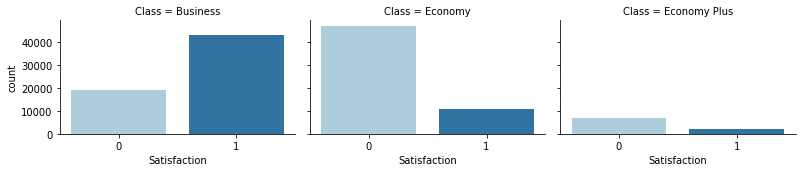

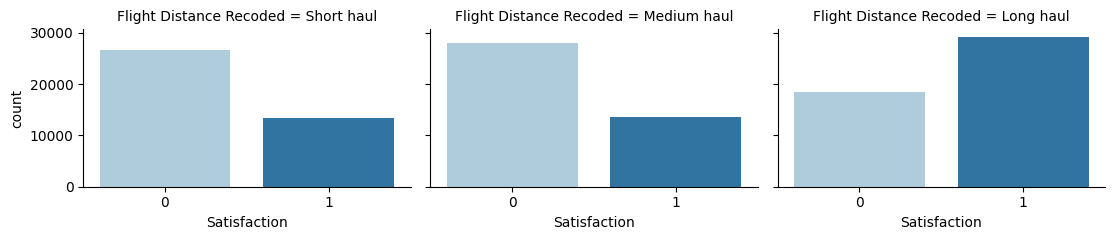

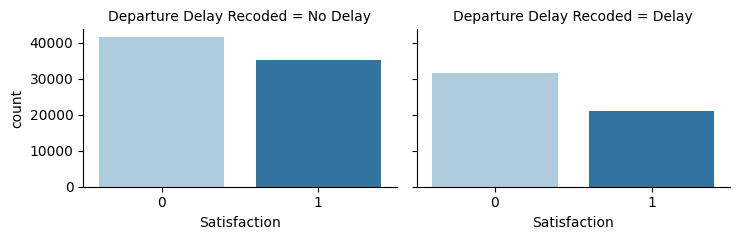

In [32]:
import seaborn as sns

# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette("Paired"))
sns.catplot("Satisfaction", col="Class", data=df, kind="count", height=2.5, aspect=1.5)
sns.catplot("Satisfaction", col="Flight Distance Recoded", data=df, kind="count", height=2.5, aspect=1.5, palette =customPalette)
sns.catplot("Satisfaction", col="Departure Delay Recoded", data=df, kind="count", height=2.5, aspect=1.5)

### Spliting dataset into 18 groups

In [33]:
# create new datasets 
#1. Business Class, Short haul, no departure delay
df_1 = df.loc[(df['Class']=='Business') &  (df['Flight Distance Recoded']== 'Short haul')& (df['Departure Delay Recoded']== 'No Delay')]

#2. Business Class, Short haul, no departure delay
df_2 = df.loc[(df['Class']=='Business') &  (df['Flight Distance Recoded']== 'Short haul')& (df['Departure Delay Recoded']== 'Delay')]


#3. Business Class, Medium haul, no departure delay
df_3 = df.loc[(df['Class']=='Business') &  (df['Flight Distance Recoded']== 'Medium haul')& (df['Departure Delay Recoded']== 'No Delay')]

#4. Business Class, Medium haul, departure delay
df_4 = df.loc[(df['Class']=='Business') &  (df['Flight Distance Recoded']== 'Medium haul')& (df['Departure Delay Recoded']== 'Delay')]


#5. Business Class, Long haul, no departure delay
df_5 = df.loc[(df['Class']=='Business') &  (df['Flight Distance Recoded']== 'Long haul')& (df['Departure Delay Recoded']== 'No Delay')]

#6. Business Class, Medium haul, departure delay
df_6 = df.loc[(df['Class']=='Business') &  (df['Flight Distance Recoded']== 'Long haul')& (df['Departure Delay Recoded']== 'Delay')]


#7. Business Class, Short haul, no departure delay
df_7 = df.loc[(df['Class']=='Economy') &  (df['Flight Distance Recoded']== 'Short haul')& (df['Departure Delay Recoded']== 'No Delay')]

#8. Business Class, Short haul, no departure delay
df_8 = df.loc[(df['Class']=='Economy') &  (df['Flight Distance Recoded']== 'Short haul')& (df['Departure Delay Recoded']== 'Delay')]


#9. Business Class, Medium haul, no departure delay
df_9 = df.loc[(df['Class']=='Economy') &  (df['Flight Distance Recoded']== 'Medium haul')& (df['Departure Delay Recoded']== 'No Delay')]

#10. Business Class, Medium haul, departure delay
df_10 = df.loc[(df['Class']=='Economy') &  (df['Flight Distance Recoded']== 'Medium haul')& (df['Departure Delay Recoded']== 'Delay')]


#11. Business Class, Long haul, no departure delay
df_11 = df.loc[(df['Class']=='Economy') &  (df['Flight Distance Recoded']== 'Long haul')& (df['Departure Delay Recoded']== 'No Delay')]

#12. Business Class, Medium haul, departure delay
df_12 = df.loc[(df['Class']=='Economy') &  (df['Flight Distance Recoded']== 'Long haul')& (df['Departure Delay Recoded']== 'Delay')]



#13. Business Class, Short haul, no departure delay
df_13 = df.loc[(df['Class']=='Economy Plus') &  (df['Flight Distance Recoded']== 'Short haul')& (df['Departure Delay Recoded']== 'No Delay')]

#14. Business Class, Short haul, no departure delay
df_14 = df.loc[(df['Class']=='Economy Plus') &  (df['Flight Distance Recoded']== 'Short haul')& (df['Departure Delay Recoded']== 'Delay')]


#15. Business Class, Medium haul, no departure delay
df_15 = df.loc[(df['Class']=='Economy Plus') &  (df['Flight Distance Recoded']== 'Medium haul')& (df['Departure Delay Recoded']== 'No Delay')]

#16. Business Class, Medium haul, departure delay
df_16 = df.loc[(df['Class']=='Economy Plus') &  (df['Flight Distance Recoded']== 'Medium haul')& (df['Departure Delay Recoded']== 'Delay')]


#17. Business Class, Long haul, no departure delay
df_17 = df.loc[(df['Class']=='Economy Plus') &  (df['Flight Distance Recoded']== 'Long haul')& (df['Departure Delay Recoded']== 'No Delay')]

#18. Business Class, Medium haul, departure delay
df_18 = df.loc[(df['Class']=='Economy Plus') &  (df['Flight Distance Recoded']== 'Long haul')& (df['Departure Delay Recoded']== 'Delay')]




In [34]:
# shape of these 18 different datasets
dataset_var = []
var_index = []
for i in range(1,19):
    dataset = globals()[str('df_')+str(i)]
    print(dataset.shape)
    if len(dataset) >0:
        dataset_var.append(dataset)
        var_index.append(i)

(7680, 21)
(4954, 21)
(7635, 21)
(5357, 21)
(21454, 21)
(14910, 21)
(14673, 21)
(8897, 21)
(14375, 21)
(10464, 21)
(5552, 21)
(4147, 21)
(2429, 21)
(1525, 21)
(2169, 21)
(1654, 21)
(906, 21)
(695, 21)


# Logistic Regression

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,auc,roc_curve,confusion_matrix

import time

In [36]:
df=df_copy.copy()

In [37]:
y_true = []
y_pred = []
y_pred_prob = []
feature_im = []

t0=time.time()

for var in dataset_var:
    X=var.drop(["Satisfaction"],axis=1)
    Y=var["Satisfaction"]
    fac_list=["Type of Travel","Customer Type","Class",'Flight Distance Recoded','Departure Delay Recoded', 'Arrival Delay Recoded']
    for i in fac_list:
        X[i]=pd.factorize(X[i])[0]
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2022)
    lr = LogisticRegression(random_state=1)
    lr.fit(x_train,y_train)
    im = lr.coef_
    feature_im.append(im)
    pred = lr.predict(x_test)
    pred_prob = lr.predict_proba(x_test)
    y_true.append(y_test)
    y_pred.append(pred)
    y_pred_prob.append(pred_prob[:,1])
    
    
lr_time = time.time()-t0

In [38]:
acc_list = []
recall_list = []
precision_list = []
f1_list = []
auc_list = []
cm_list = []
fpr_list = []
tpr_list = []
for i in range(len(dataset_var)):
    acc_list.append(accuracy_score(y_true[i],y_pred[i]))
    recall_list.append(recall_score(y_true[i],y_pred[i]))
    precision_list.append(precision_score(y_true[i],y_pred[i]))
    f1_list.append(f1_score(y_true[i],y_pred[i]))
    cm_list.append(confusion_matrix(y_true[i],y_pred[i]))
    fpr,tpr,_ = roc_curve(y_true[i],y_pred_prob[i])
    auc_list.append(auc(fpr,tpr))
    fpr_list.append(fpr)
    tpr_list.append(tpr)


In [39]:
dataset_index = []
for index in var_index:
    dataset_index.append(f'df_{index}')

In [40]:
# accuracy,recall,precision
result =  pd.DataFrame({'accuracy':acc_list,'recall':recall_list,'precision':precision_list,'f1-score':f1_list,'auc':auc_list},index=dataset_index)
result

accuracy    recall  precision  f1-score       auc
df_1   0.881510  0.907950   0.902287  0.905109  0.943989
df_2   0.867810  0.897959   0.864286  0.880801  0.938041
df_3   0.886051  0.922465   0.906250  0.914286  0.949701
df_4   0.882463  0.922835   0.883861  0.902928  0.944842
df_5   0.900955  0.948292   0.925074  0.936539  0.950722
df_6   0.898055  0.940437   0.919891  0.930051  0.957945
df_7   0.900170  0.682451   0.882883  0.769835  0.951755
df_8   0.934270  0.683594   0.829384  0.749465  0.961953
df_9   0.905391  0.704248   0.825670  0.760141  0.958232
df_10  0.931677  0.666667   0.856000  0.749562  0.961358
df_11  0.908191  0.617647   0.840000  0.711864  0.955445
df_12  0.938554  0.740385   0.762376  0.751220  0.967459
df_13  0.888889  0.788235   0.881579  0.832298  0.961355
df_14  0.901639  0.716418   0.813559  0.761905  0.944218
df_15  0.914747  0.803419   0.870370  0.835556  0.952142
df_16  0.921450  0.790323   0.790323  0.790323  0.956350
df_17  0.912088  0.760000   0.904762  0.826087  0.977121
df_18  0.949640  0.888889   0.857143  0.872727  0.982804

In [41]:
mean_auc_lr = np.mean(auc_list)
mean_auc_lr

0.9564128476567036

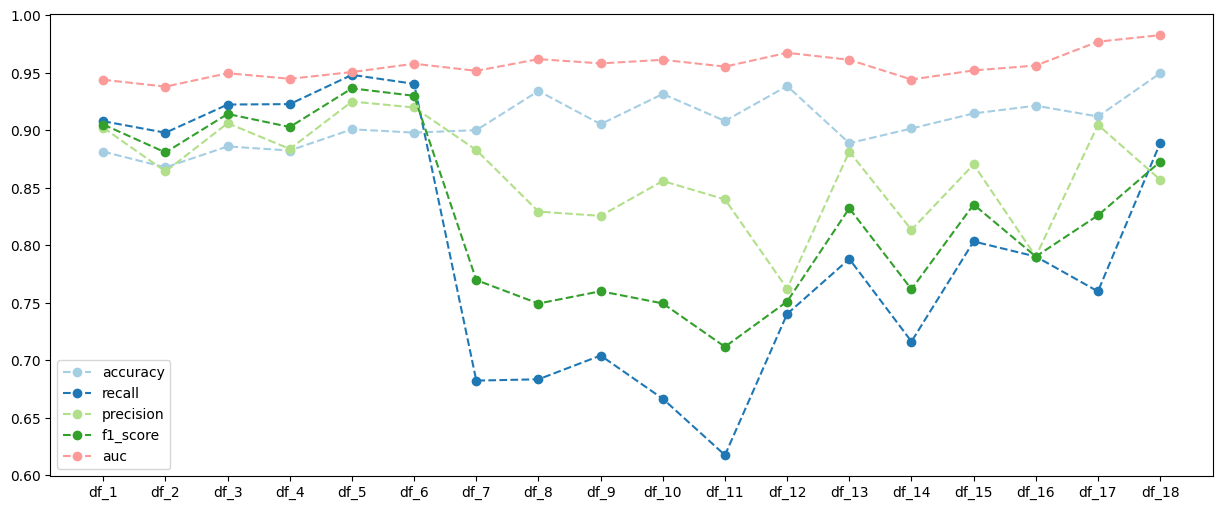

In [42]:
plt.figure(figsize=(15,6))
plt.plot(np.array(acc_list),'--o',label='accuracy')
plt.plot(np.array(recall_list),'--o',label='recall')
plt.plot(np.array(precision_list),'--o',label='precision')
plt.plot(np.array(f1_list),'--o',label='f1_score')
plt.plot(np.array(auc_list),'--o',label='auc')
plt.xticks(range(0,18),labels=dataset_index)
#plt.set_xticklabels(dataset_index)
plt.legend()
plt.show()

In [43]:
col = df_1.drop(["Satisfaction"],axis=1).columns
feature_im = np.array(feature_im).reshape(len(var_index),20)
arr = np.argsort(-feature_im)[:,:5]
dict_im = {}
top_1,top_2,top_3,top_4,top_5 = [],[],[],[],[]
for i in range(len(var_index)):
    top_1.append(col[arr[i]][0])
    top_2.append(col[arr[i]][1])
    top_3.append(col[arr[i]][2])
    top_4.append(col[arr[i]][3])
    top_5.append(col[arr[i]][4])
dict_im = {'top1':top_1,'top2':top_2,'top3':top_3,'top4':top_4,'top5':top_5}
pd.DataFrame(dict_im,index=dataset_index)

top1                    top2  \
df_1            Customer Type  In-flight Wifi Service   
df_2            Customer Type         Online Boarding   
df_3            Customer Type         Online Boarding   
df_4            Customer Type         Online Boarding   
df_5          Online Boarding        On-board Service   
df_6          Online Boarding        Check-in Service   
df_7   In-flight Wifi Service           Customer Type   
df_8   In-flight Wifi Service           Customer Type   
df_9   In-flight Wifi Service          Type of Travel   
df_10  In-flight Wifi Service          Type of Travel   
df_11  In-flight Wifi Service           Customer Type   
df_12  In-flight Wifi Service          Type of Travel   
df_13  In-flight Wifi Service        Check-in Service   
df_14          Type of Travel  In-flight Wifi Service   
df_15  In-flight Wifi Service            Seat Comfort   
df_16  In-flight Wifi Service          Type of Travel   
df_17  In-flight Wifi Service          Type of Travel   
df_18  In-flight Wifi Service         Online Boarding   

                          top3                    top4  \
df_1           Online Boarding        Leg Room Service   
df_2    In-flight Wifi Service       In-flight Service   
df_3    In-flight Wifi Service        Check-in Service   
df_4    In-flight Wifi Service        On-board Service   
df_5          Check-in Service             Cleanliness   
df_6          On-board Service             Cleanliness   
df_7          On-board Service        Check-in Service   
df_8          Check-in Service             Cleanliness   
df_9          Check-in Service        On-board Service   
df_10         Check-in Service            Seat Comfort   
df_11         Check-in Service         Online Boarding   
df_12          Online Boarding          Food and Drink   
df_13         On-board Service         Online Boarding   
df_14         Check-in Service        On-board Service   
df_15          Online Boarding        On-board Service   
df_16          Online Boarding        Check-in Service   
df_17          Online Boarding  Ease of Online Booking   
df_18  In-flight Entertainment        Check-in Service   

                                         top5  
df_1                         Check-in Service  
df_2                         Check-in Service  
df_3                              Cleanliness  
df_4                         Check-in Service  
df_5                   In-flight Wifi Service  
df_6                        In-flight Service  
df_7                          Online Boarding  
df_8                         On-board Service  
df_9                              Cleanliness  
df_10                        On-board Service  
df_11                        On-board Service  
df_12                        Baggage Handling  
df_13                             Cleanliness  
df_14                  Ease of Online Booking  
df_15                        Check-in Service  
df_16                        On-board Service  
df_17  Departure and Arrival Time Convenience  
df_18                            Seat Comfort

In [44]:
# all the feature importance
index = dataset_index
col = df_1.drop(["Satisfaction"],axis=1).columns
f = np.array(feature_im).reshape(len(var_index),20)
f = pd.DataFrame(f,columns=col,index=index)
f

Customer Type  Type of Travel  Class  \
df_1        2.989277       -3.929344    0.0   
df_2        2.573521       -3.803476    0.0   
df_3        2.720939       -3.422666    0.0   
df_4        2.595105       -3.988136    0.0   
df_5       -3.189786       -4.203762    0.0   
df_6       -2.556532       -3.743290    0.0   
df_7        2.275559       -2.598884    0.0   
df_8        1.965893       -2.516610    0.0   
df_9       -1.875449        2.453581    0.0   
df_10      -1.839573        2.440005    0.0   
df_11       1.117333       -1.496639    0.0   
df_12      -1.242313        1.772545    0.0   
df_13      -2.266845       -2.898944    0.0   
df_14      -2.268158        2.370159    0.0   
df_15      -2.246253       -2.345002    0.0   
df_16      -1.507697        2.045469    0.0   
df_17      -0.784187        2.087101    0.0   
df_18      -1.519082       -0.964373    0.0   

       Departure and Arrival Time Convenience  Ease of Online Booking  \
df_1                                -0.390783                0.173836   
df_2                                -0.234858                0.167686   
df_3                                -0.487638                0.175857   
df_4                                -0.373623                0.216650   
df_5                                 0.107327                0.041844   
df_6                                 0.051780                0.089313   
df_7                                -0.071257               -0.079108   
df_8                                -0.033458                0.092251   
df_9                                 0.003886               -0.221690   
df_10                                0.018040                0.031072   
df_11                               -0.019618               -0.209322   
df_12                                0.027363                0.077114   
df_13                               -0.161925                0.100050   
df_14                               -0.174312                0.152398   
df_15                               -0.072521               -0.089115   
df_16                                0.028262               -0.006106   
df_17                                0.127951                0.243868   
df_18                               -0.188851               -0.077925   

       Check-in Service  Online Boarding  Gate Location  On-board Service  \
df_1           0.378283         0.766289      -0.286243          0.316311   
df_2           0.361668         0.848120      -0.191659          0.333122   
df_3           0.390789         1.097442      -0.150762          0.337647   
df_4           0.395516         1.203508      -0.215153          0.429611   
df_5           0.577795         0.703050      -0.365844          0.614219   
df_6           0.562262         0.767726      -0.269953          0.506743   
df_7           0.155275         0.138393      -0.028967          0.176780   
df_8           0.252337         0.068506      -0.008779          0.164568   
df_9           0.243155         0.046818       0.022439          0.135271   
df_10          0.203290        -0.115365      -0.093194          0.095771   
df_11          0.118026         0.109009       0.071845          0.102145   
df_12          0.111832         0.368392      -0.124002          0.040596   
df_13          0.357475         0.173494       0.074137          0.179379   
df_14          0.322491         0.033139       0.097122          0.264988   
df_15          0.125506         0.171862       0.097059          0.157054   
df_16          0.285546         0.335691       0.010312          0.143314   
df_17          0.013661         0.599894      -0.190632          0.090337   
df_18          0.236742         0.773377       0.161016          0.145095   

       Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  \
df_1       0.050661          0.379940     0.254042       -0.157761   
df_2       0.042700          0.291526     0.257905       -0.034963   
df_3       0.063563          0.264669     0.357113 

In [45]:
# confusion matrix information
for i,index in enumerate(var_index):
    print(f'df_{index}:\n',cm_list[i])
    print('\n')

df_1:
 [[486  94]
 [ 88 868]]


df_2:
 [[376  76]
 [ 55 484]]


df_3:
 [[425  96]
 [ 78 928]]


df_4:
 [[360  77]
 [ 49 586]]


df_5:
 [[ 730  254]
 [ 171 3136]]


df_6:
 [[ 657  176]
 [ 128 2021]]


df_7:
 [[2152   65]
 [ 228  490]]


df_8:
 [[1488   36]
 [  81  175]]


df_9:
 [[2172   91]
 [ 181  431]]


df_10:
 [[1736   36]
 [ 107  214]]


df_11:
 [[883  24]
 [ 78 126]]


df_12:
 [[702  24]
 [ 27  77]]


df_13:
 [[298  18]
 [ 36 134]]


df_14:
 [[227  11]
 [ 19  48]]


df_15:
 [[303  14]
 [ 23  94]]


df_16:
 [[256  13]
 [ 13  49]]


df_17:
 [[128   4]
 [ 12  38]]


df_18:
 [[108   4]
 [  3  24]]




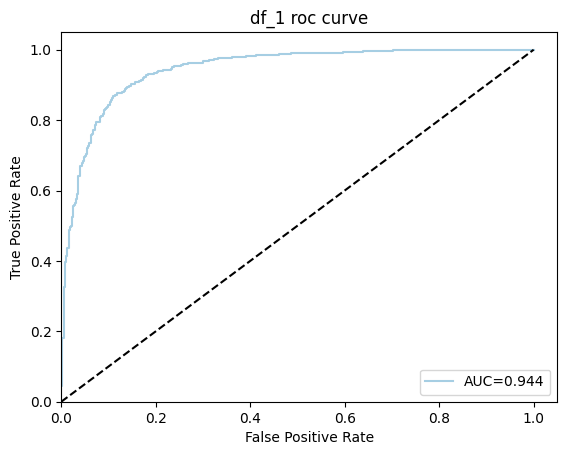

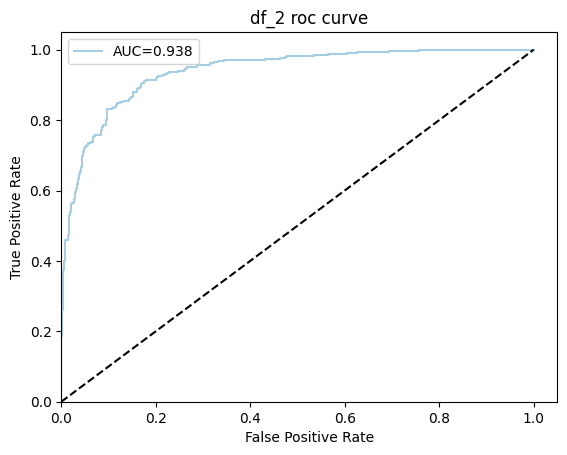

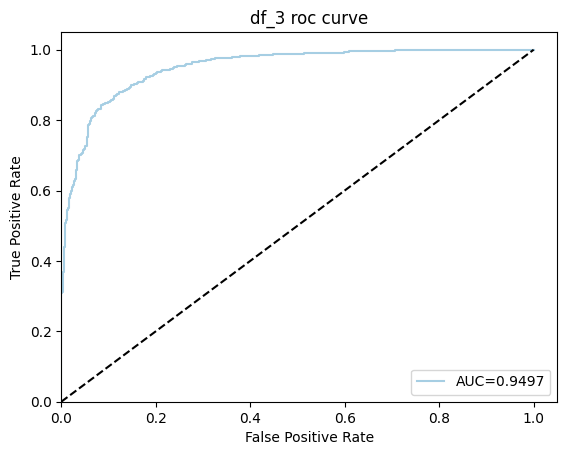

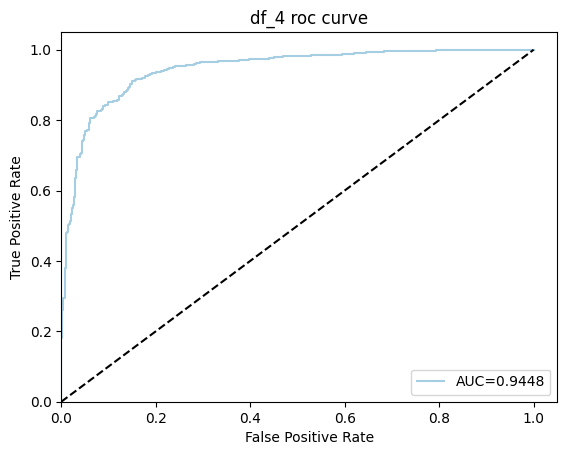

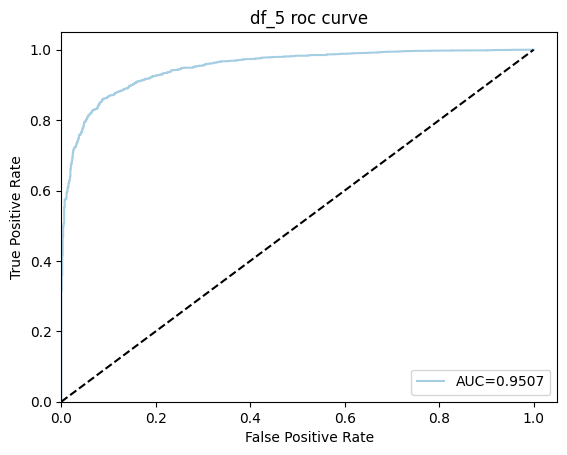

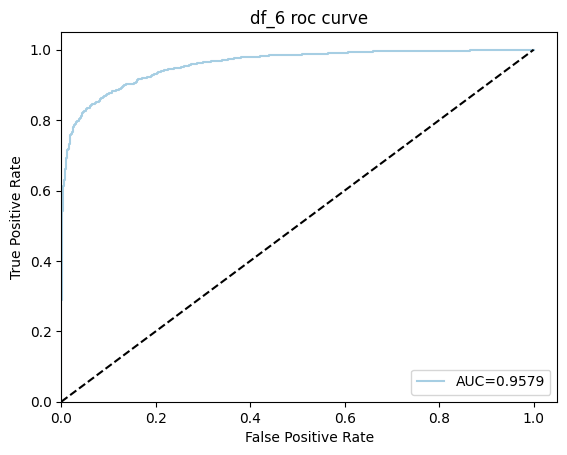

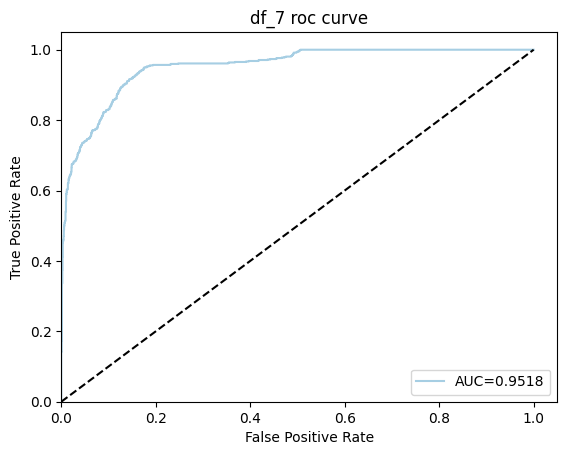

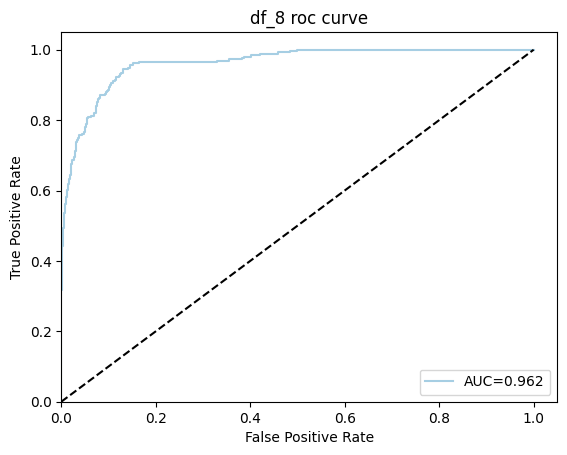

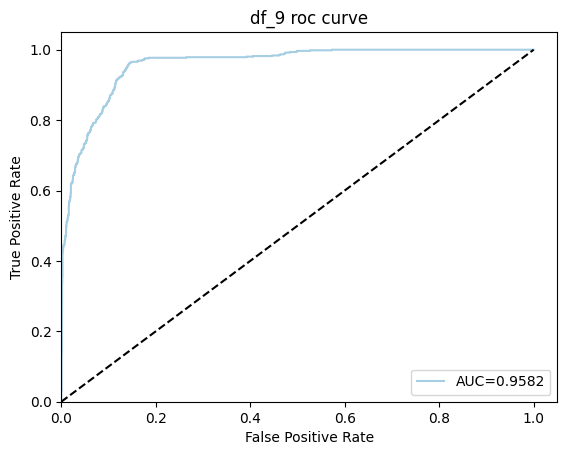

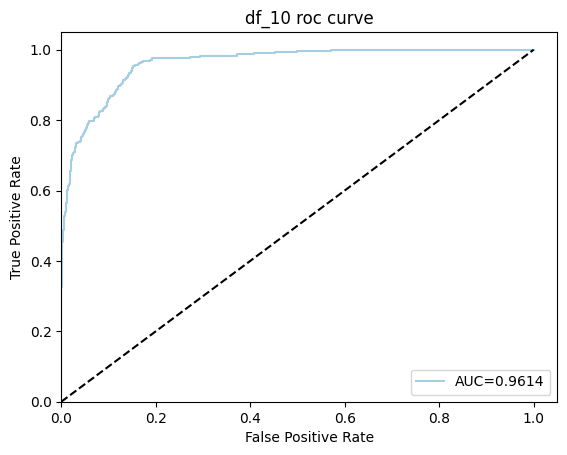

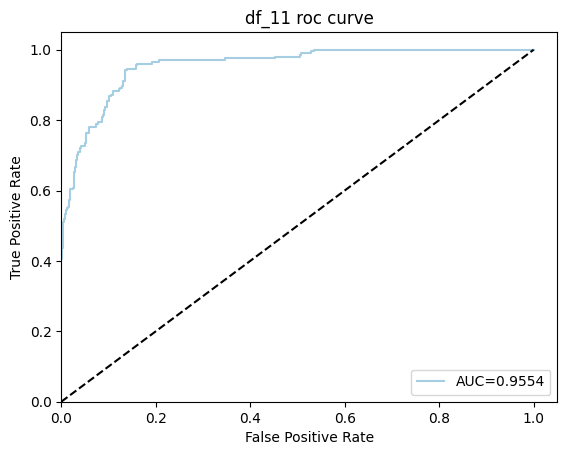

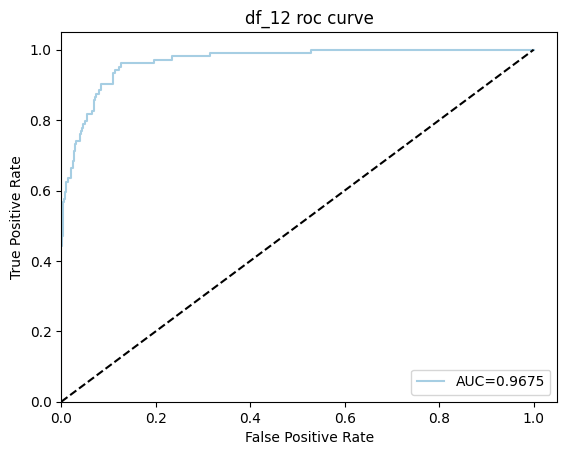

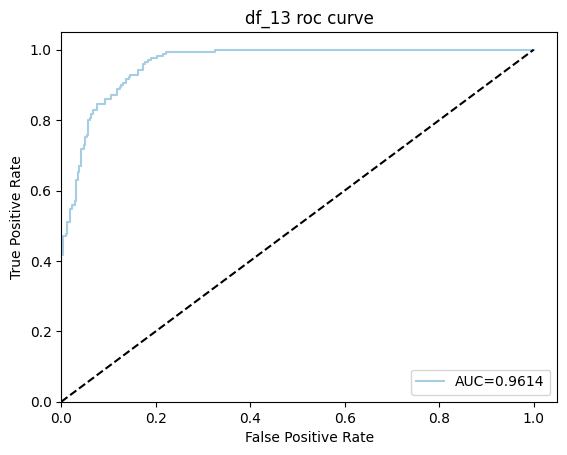

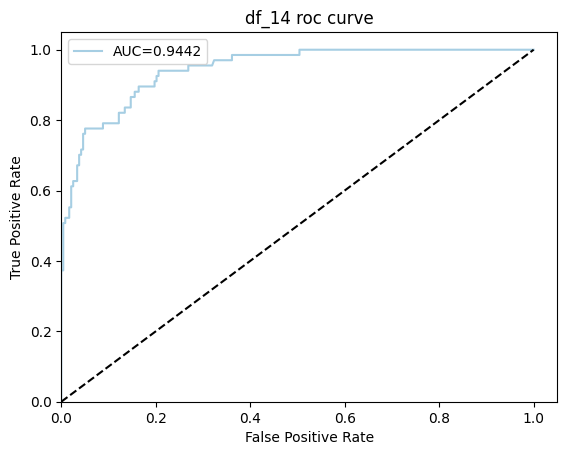

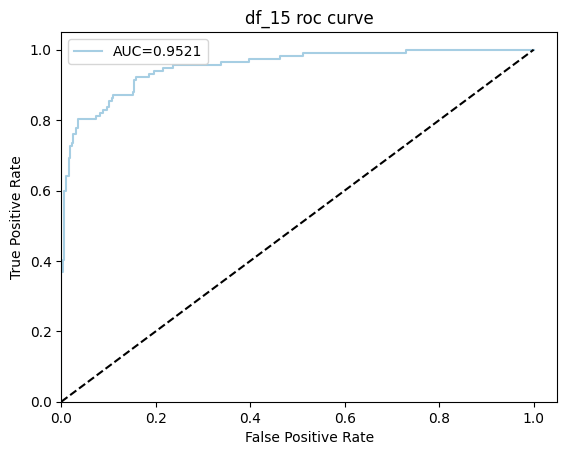

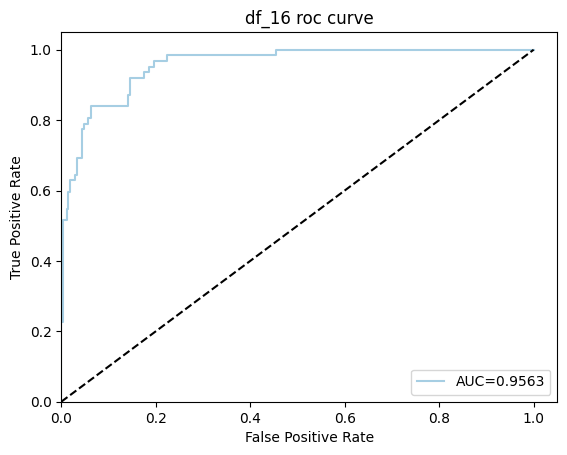

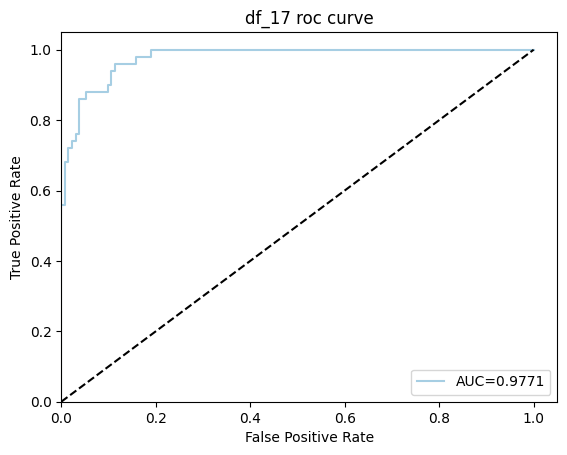

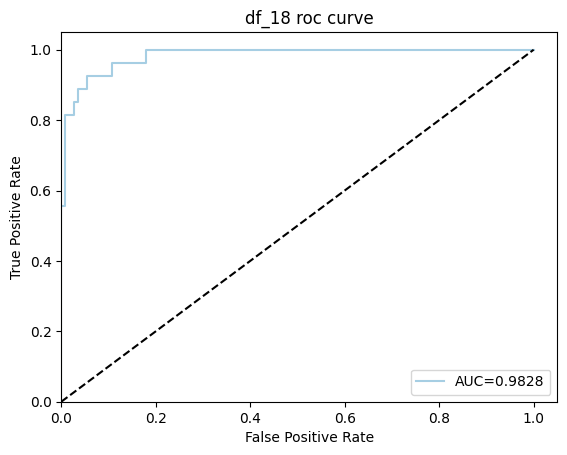

In [46]:
# roc curve
for i,index in enumerate(var_index):
    plt.figure(i)
    plt.plot(
            fpr_list[i],
            tpr_list[i],     
            label=f"AUC={np.round(auc_list[i],4)}"
        )    
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.title(f'df_{index} roc curve')

# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
y_true = []
y_pred = []
y_pred_prob = []
feature_im = []

t0=time.time()

for var in dataset_var:
    X=var.drop(["Satisfaction"],axis=1)
    Y=var["Satisfaction"]
    fac_list=["Type of Travel","Customer Type","Class",'Flight Distance Recoded','Departure Delay Recoded', 'Arrival Delay Recoded']
    for i in fac_list:
        X[i]=pd.factorize(X[i])[0]
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2022)
    rf = RandomForestClassifier(random_state=1)
    rf.fit(x_train,y_train)
    im = rf.feature_importances_
    feature_im.append(im)
    pred = rf.predict(x_test)
    pred_prob = rf.predict_proba(x_test)
    y_true.append(y_test)
    y_pred.append(pred)
    y_pred_prob.append(pred_prob[:,1])
    
rf_time = time.time()-t0

In [49]:
acc_list = []
recall_list = []
precision_list = []
f1_list = []
auc_list = []
cm_list = []
fpr_list = []
tpr_list = []
for i in range(len(dataset_var)):
    acc_list.append(accuracy_score(y_true[i],y_pred[i]))
    recall_list.append(recall_score(y_true[i],y_pred[i]))
    precision_list.append(precision_score(y_true[i],y_pred[i]))
    f1_list.append(f1_score(y_true[i],y_pred[i]))
    cm_list.append(confusion_matrix(y_true[i],y_pred[i]))
    fpr,tpr,_ = roc_curve(y_true[i],y_pred_prob[i])
    auc_list.append(auc(fpr,tpr))
    fpr_list.append(fpr)
    tpr_list.append(tpr)

In [50]:
dataset_index = []
for index in var_index:
    dataset_index.append(f'df_{index}')

In [51]:
result =  pd.DataFrame({'accuracy':acc_list,'recall':recall_list,'precision':precision_list,'f1-score':f1_list,'auc':auc_list},index=dataset_index)
result

accuracy    recall  precision  f1-score       auc
df_1   0.951172  0.961297   0.960293  0.960795  0.986267
df_2   0.951564  0.961039   0.950459  0.955720  0.986383
df_3   0.958088  0.967197   0.969124  0.968159  0.987889
df_4   0.945896  0.962205   0.947287  0.954688  0.988650
df_5   0.976695  0.984578   0.985174  0.984876  0.996543
df_6   0.980550  0.986505   0.986505  0.986505  0.997169
df_7   0.931516  0.805014   0.904538  0.851879  0.976895
df_8   0.955056  0.769531   0.903670  0.831224  0.982617
df_9   0.925217  0.792484   0.846422  0.818565  0.975216
df_10  0.942666  0.728972   0.876404  0.795918  0.969779
df_11  0.923492  0.710784   0.847953  0.773333  0.969234
df_12  0.942169  0.701923   0.811111  0.752577  0.971876
df_13  0.907407  0.817647   0.908497  0.860681  0.965972
df_14  0.914754  0.671642   0.918367  0.775862  0.967233
df_15  0.926267  0.820513   0.897196  0.857143  0.969937
df_16  0.939577  0.725806   0.937500  0.818182  0.964384
df_17  0.906593  0.760000   0.883721  0.817204  0.967121
df_18  0.935252  0.777778   0.875000  0.823529  0.980159

In [52]:
mean_auc_rf = np.mean(auc_list)
mean_auc_rf

0.9779625429337059

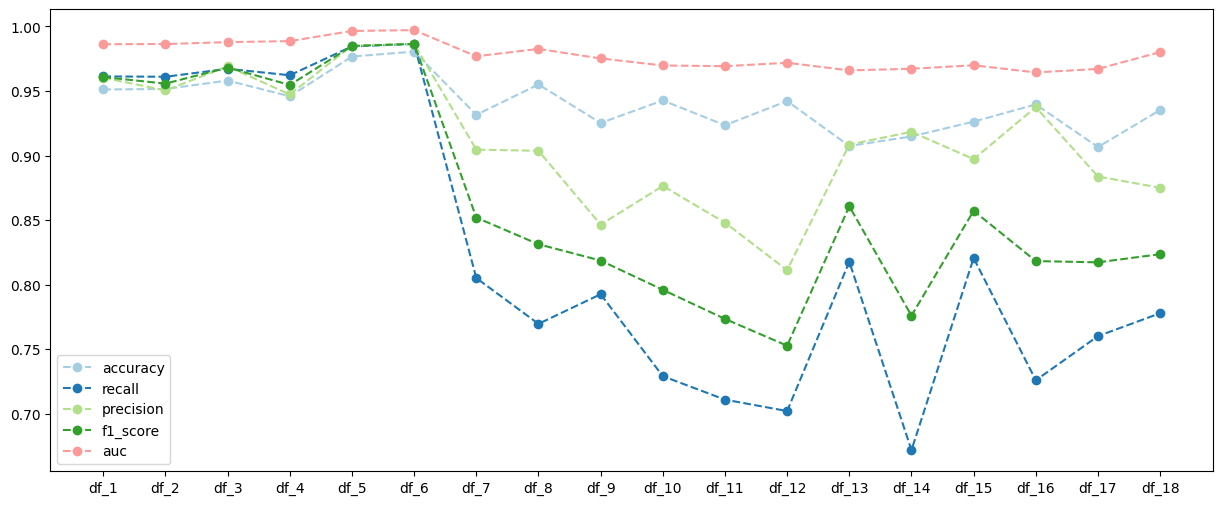

In [53]:
plt.figure(figsize=(15,6))
plt.plot(np.array(acc_list),'--o',label='accuracy')
plt.plot(np.array(recall_list),'--o',label='recall')
plt.plot(np.array(precision_list),'--o',label='precision')
plt.plot(np.array(f1_list),'--o',label='f1_score')
plt.plot(np.array(auc_list),'--o',label='auc')
plt.xticks(range(0,18),labels=dataset_index)
#plt.set_xticklabels(dataset_index)
plt.legend()
plt.show()

In [54]:
# confusion matrix information
for i,index in enumerate(var_index):
    print(f'df_{index}:\n',cm_list[i])
    print('\n')

df_1:
 [[542  38]
 [ 37 919]]


df_2:
 [[425  27]
 [ 21 518]]


df_3:
 [[490  31]
 [ 33 973]]


df_4:
 [[403  34]
 [ 24 611]]


df_5:
 [[ 935   49]
 [  51 3256]]


df_6:
 [[ 804   29]
 [  29 2120]]


df_7:
 [[2156   61]
 [ 140  578]]


df_8:
 [[1503   21]
 [  59  197]]


df_9:
 [[2175   88]
 [ 127  485]]


df_10:
 [[1739   33]
 [  87  234]]


df_11:
 [[881  26]
 [ 59 145]]


df_12:
 [[709  17]
 [ 31  73]]


df_13:
 [[302  14]
 [ 31 139]]


df_14:
 [[234   4]
 [ 22  45]]


df_15:
 [[306  11]
 [ 21  96]]


df_16:
 [[266   3]
 [ 17  45]]


df_17:
 [[127   5]
 [ 12  38]]


df_18:
 [[109   3]
 [  6  21]]




In [55]:
col = df_1.drop(["Satisfaction"],axis=1).columns
feature_im = np.array(feature_im).reshape(len(var_index),20)
arr = np.argsort(-feature_im)[:,:5]
dict_im = {}
top_1,top_2,top_3,top_4,top_5 = [],[],[],[],[]
for i in range(len(var_index)):
    top_1.append(col[arr[i]][0])
    top_2.append(col[arr[i]][1])
    top_3.append(col[arr[i]][2])
    top_4.append(col[arr[i]][3])
    top_5.append(col[arr[i]][4])
dict_im = {'top1':top_1,'top2':top_2,'top3':top_3,'top4':top_4,'top5':top_5}
pd.DataFrame(dict_im,index=dataset_index)

top1                     top2  \
df_1          Online Boarding   In-flight Wifi Service   
df_2          Online Boarding   In-flight Wifi Service   
df_3          Online Boarding   In-flight Wifi Service   
df_4          Online Boarding   In-flight Wifi Service   
df_5          Online Boarding  In-flight Entertainment   
df_6          Online Boarding             Seat Comfort   
df_7   In-flight Wifi Service          Online Boarding   
df_8   In-flight Wifi Service          Online Boarding   
df_9   In-flight Wifi Service          Online Boarding   
df_10  In-flight Wifi Service          Online Boarding   
df_11  In-flight Wifi Service          Online Boarding   
df_12  In-flight Wifi Service          Online Boarding   
df_13  In-flight Wifi Service          Online Boarding   
df_14  In-flight Wifi Service          Online Boarding   
df_15  In-flight Wifi Service          Online Boarding   
df_16  In-flight Wifi Service          Online Boarding   
df_17  In-flight Wifi Service          Online Boarding   
df_18  In-flight Wifi Service          Online Boarding   

                          top3                     top4  \
df_1          Leg Room Service  In-flight Entertainment   
df_2   In-flight Entertainment         Leg Room Service   
df_3   In-flight Entertainment             Seat Comfort   
df_4              Seat Comfort  In-flight Entertainment   
df_5    In-flight Wifi Service             Seat Comfort   
df_6   In-flight Entertainment   In-flight Wifi Service   
df_7    Ease of Online Booking           Type of Travel   
df_8    Ease of Online Booking           Type of Travel   
df_9    Ease of Online Booking           Type of Travel   
df_10   Ease of Online Booking           Type of Travel   
df_11   Ease of Online Booking         Baggage Handling   
df_12   Ease of Online Booking         Baggage Handling   
df_13           Type of Travel  In-flight Entertainment   
df_14           Type of Travel  In-flight Entertainment   
df_15           Type of Travel   Ease of Online Booking   
df_16           Type of Travel  In-flight Entertainment   
df_17           Type of Travel   Ease of Online Booking   
df_18   Ease of Online Booking           Food and Drink   

                          top5  
df_1             Customer Type  
df_2              Seat Comfort  
df_3             Customer Type  
df_4            Type of Travel  
df_5               Cleanliness  
df_6               Cleanliness  
df_7          Check-in Service  
df_8          Check-in Service  
df_9          Check-in Service  
df_10        In-flight Service  
df_11        In-flight Service  
df_12         Check-in Service  
df_13   Ease of Online Booking  
df_14         Baggage Handling  
df_15  In-flight Entertainment  
df_16           Food and Drink  
df_17           Food and Drink  
df_18         Baggage Handling

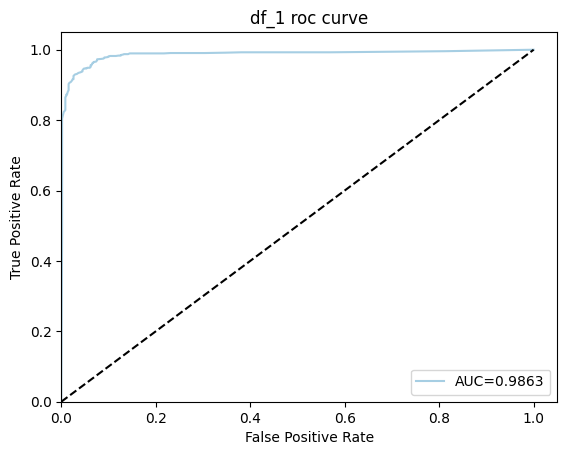

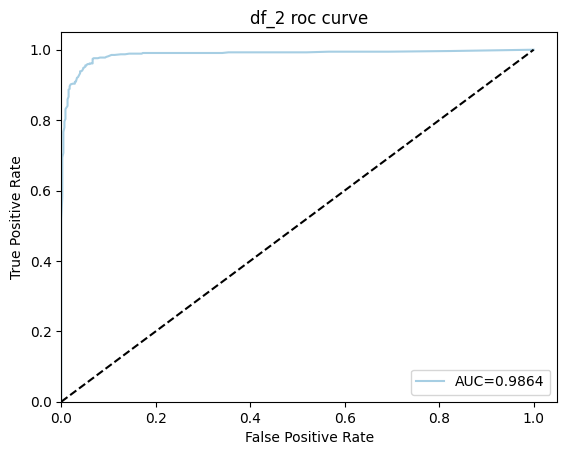

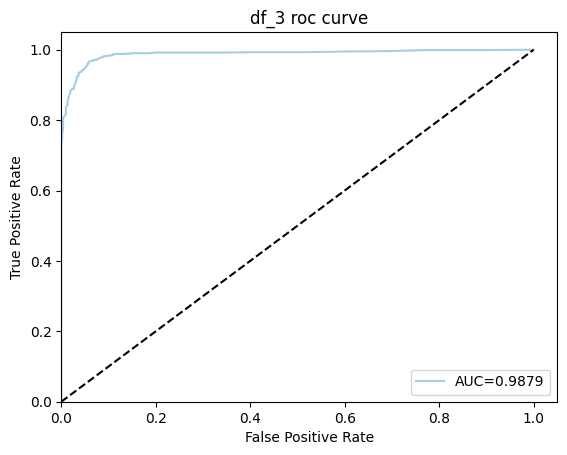

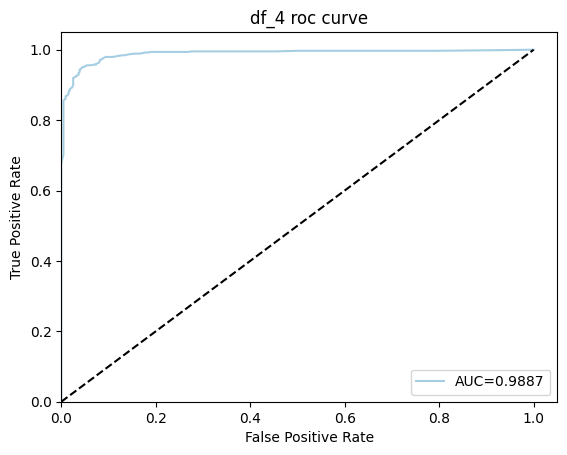

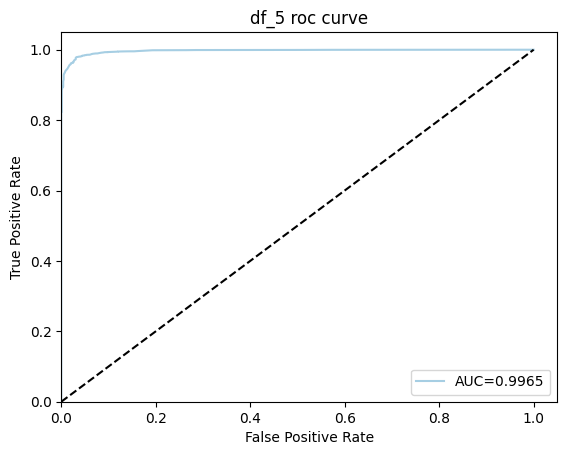

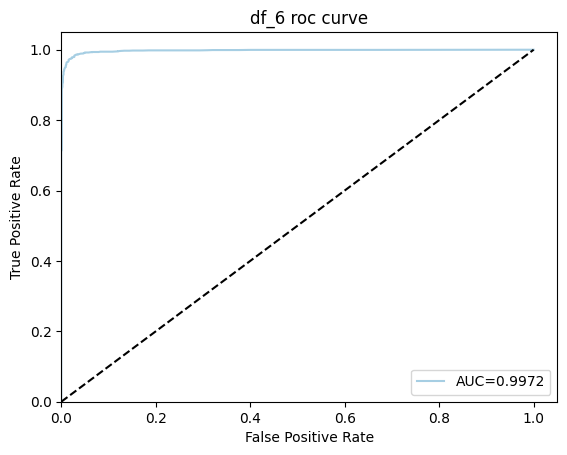

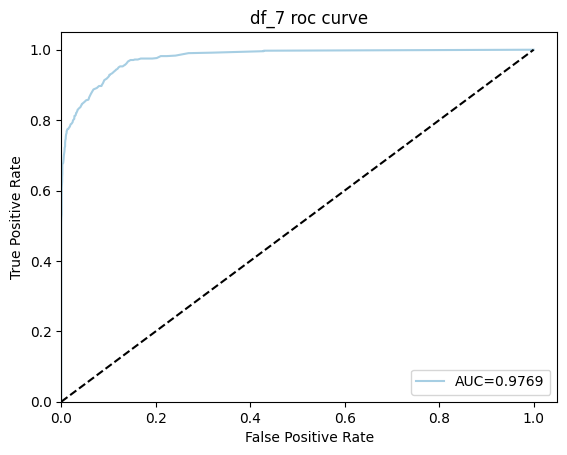

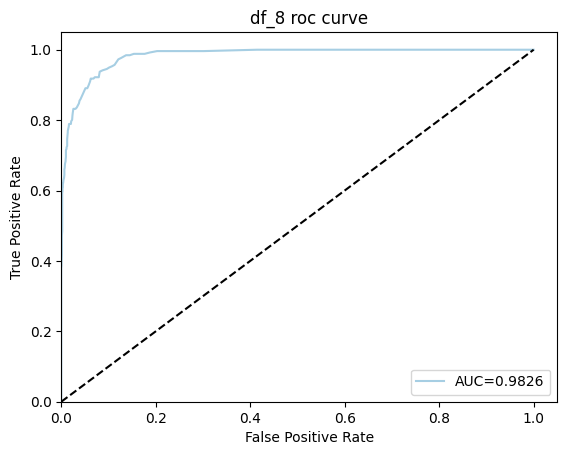

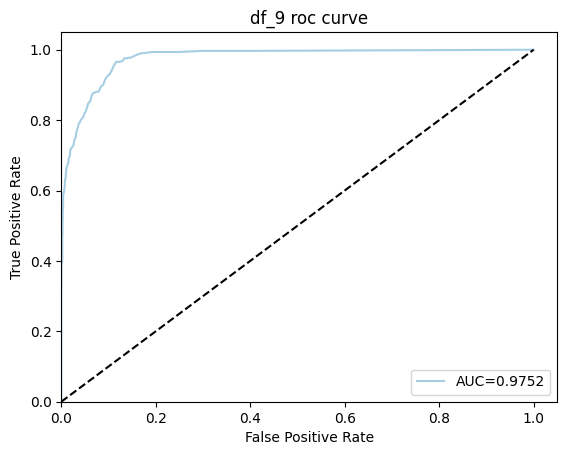

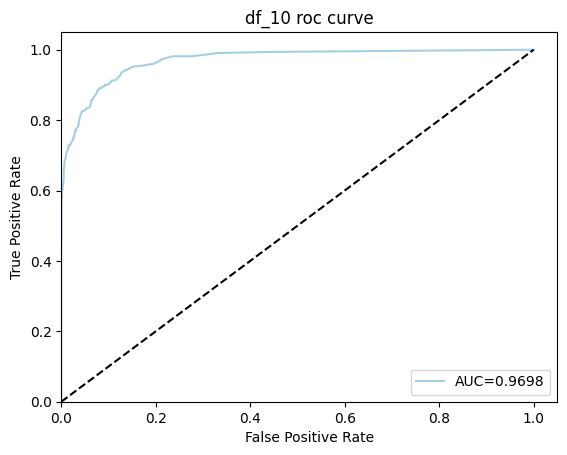

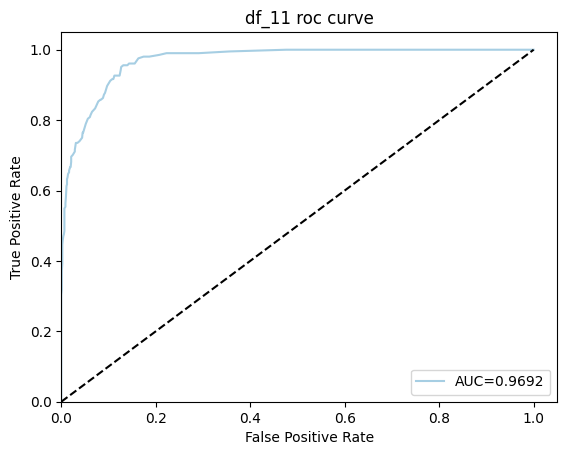

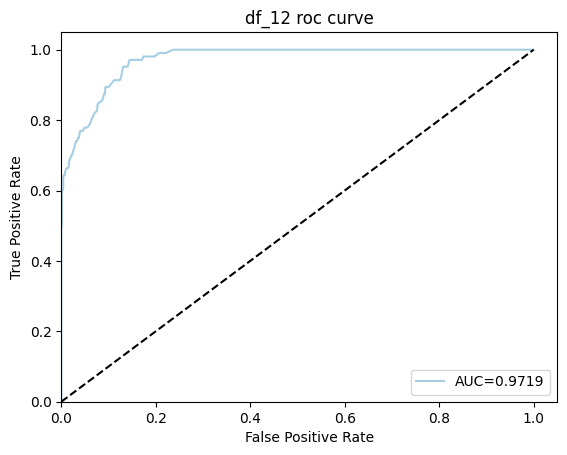

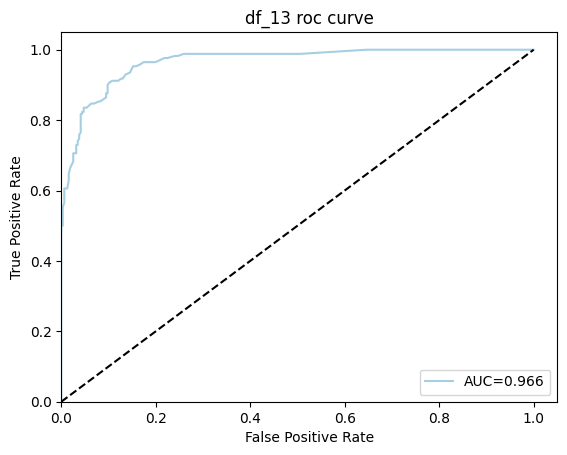

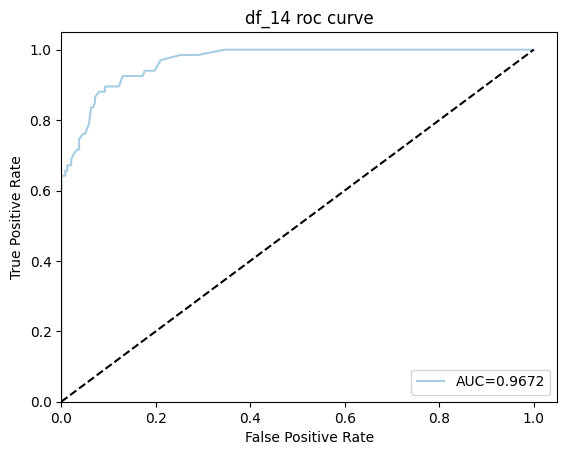

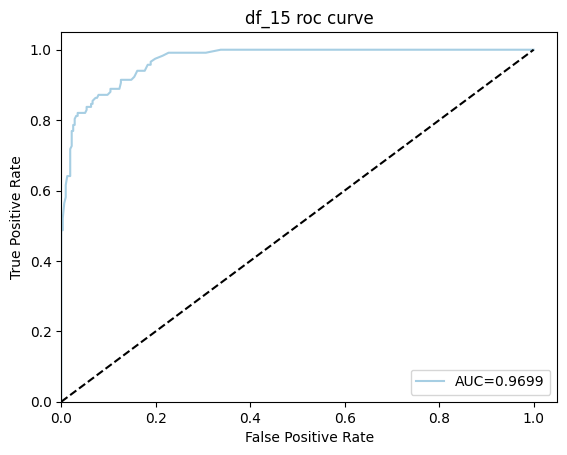

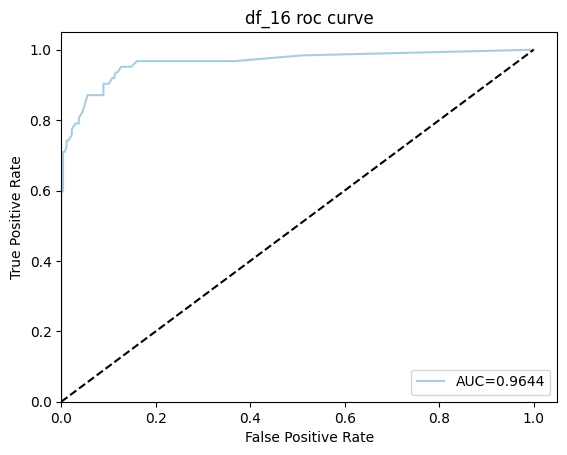

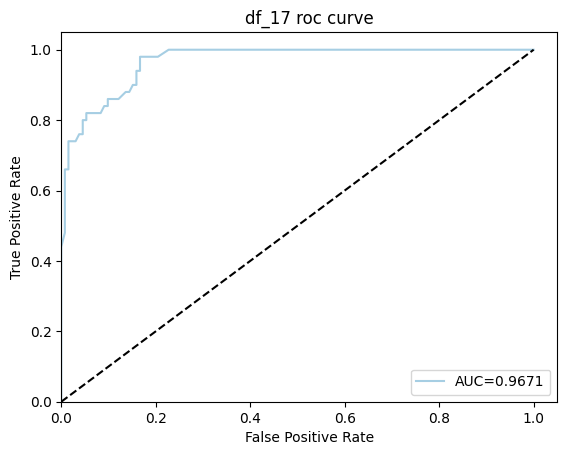

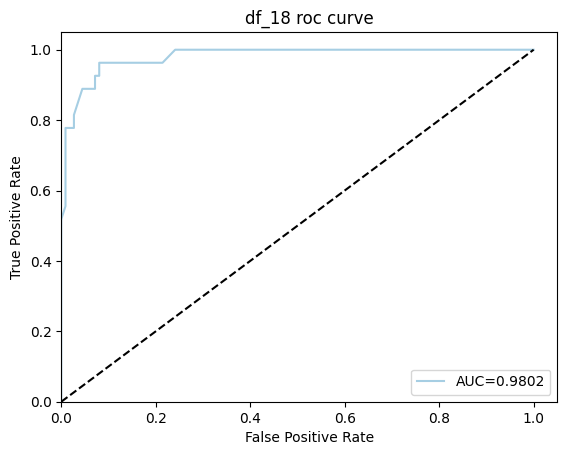

In [56]:
# roc curve
for i,index in enumerate(var_index):
    plt.figure(i)
    plt.plot(
            fpr_list[i],
            tpr_list[i],     
            label=f"AUC={np.round(auc_list[i],4)}"
        )    
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.title(f'df_{index} roc curve')

# Decision Trees

In [57]:
import pydotplus
import graphviz
from collections import defaultdict

In [58]:
y_true = []
y_pred = []
y_pred_prob = []
feature_im = []

t0=time.time()

for n, var in enumerate(dataset_var):
    X=var.drop(["Satisfaction"],axis=1)
    Y=var["Satisfaction"]
    fac_list=["Type of Travel","Customer Type","Class",'Flight Distance Recoded','Departure Delay Recoded', 'Arrival Delay Recoded']
    for i in fac_list:
        X[i]=pd.factorize(X[i])[0]
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2022)
    
    parameters = [
    {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [100]},
    {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [3], 'min_samples_split': [100, 200, 500, 1000, 2000,5000]}] 
    dtcv = GridSearchCV(
        DecisionTreeClassifier(), parameters, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=2022))
    dtcv.fit(x_train, y_train)
   
    clf = dtcv.best_estimator_

    dot_data = tree.export_graphviz(clf, feature_names = x_train.columns, out_file=None)
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_png("Decision_Tree"+str(n)+".png")
    
    im = dtcv.best_estimator_.feature_importances_
    feature_im.append(im)
    pred = dtcv.predict(x_test)
    pred_prob = dtcv.predict_proba(x_test)
    y_true.append(y_test)
    y_pred.append(pred)
    y_pred_prob.append(pred_prob[:,1])
    
    

    
    
dt_time = time.time()-t0

In [59]:
acc_list = []
recall_list = []
precision_list = []
f1_list = []
auc_list = []
cm_list = []
fpr_list = []
tpr_list = []
for i in range(len(dataset_var)):
    acc_list.append(accuracy_score(y_true[i],y_pred[i]))
    recall_list.append(recall_score(y_true[i],y_pred[i]))
    precision_list.append(precision_score(y_true[i],y_pred[i]))
    f1_list.append(f1_score(y_true[i],y_pred[i]))
    cm_list.append(confusion_matrix(y_true[i],y_pred[i]))
    fpr,tpr,_ = roc_curve(y_true[i],y_pred_prob[i])
    auc_list.append(auc(fpr,tpr))
    fpr_list.append(fpr)
    tpr_list.append(tpr)

In [60]:
dataset_index = []
for index in var_index:
    dataset_index.append(f'df_{index}')
result =  pd.DataFrame({'accuracy':acc_list,'recall':recall_list,'precision':precision_list,'f1-score':f1_list,'auc':auc_list},index=dataset_index)
result

accuracy    recall  precision  f1-score       auc
df_1   0.934896  0.951883   0.943983  0.947917  0.979766
df_2   0.919273  0.964750   0.895009  0.928571  0.966759
df_3   0.933202  0.951292   0.947525  0.949405  0.975531
df_4   0.928172  0.940157   0.938679  0.939418  0.978659
df_5   0.957586  0.975507   0.969642  0.972566  0.985834
df_6   0.948357  0.973476   0.955688  0.964500  0.987803
df_7   0.931175  0.795265   0.912141  0.849702  0.974660
df_8   0.958427  0.781250   0.917431  0.843882  0.985018
df_9   0.931826  0.815359   0.857388  0.835846  0.974210
df_10  0.946011  0.788162   0.848993  0.817447  0.970692
df_11  0.924392  0.725490   0.840909  0.778947  0.963681
df_12  0.939759  0.769231   0.754717  0.761905  0.962340
df_13  0.905350  0.847059   0.878049  0.862275  0.965450
df_14  0.914754  0.791045   0.815385  0.803030  0.952465
df_15  0.926267  0.897436   0.840000  0.867769  0.977271
df_16  0.921450  0.645161   0.909091  0.754717  0.964234
df_17  0.923077  0.800000   0.909091  0.851064  0.950379
df_18  0.884892  0.407407   1.000000  0.578947  0.955192

In [61]:
mean_auc_dt = np.mean(auc_list)
mean_auc_dt

0.970552432532052

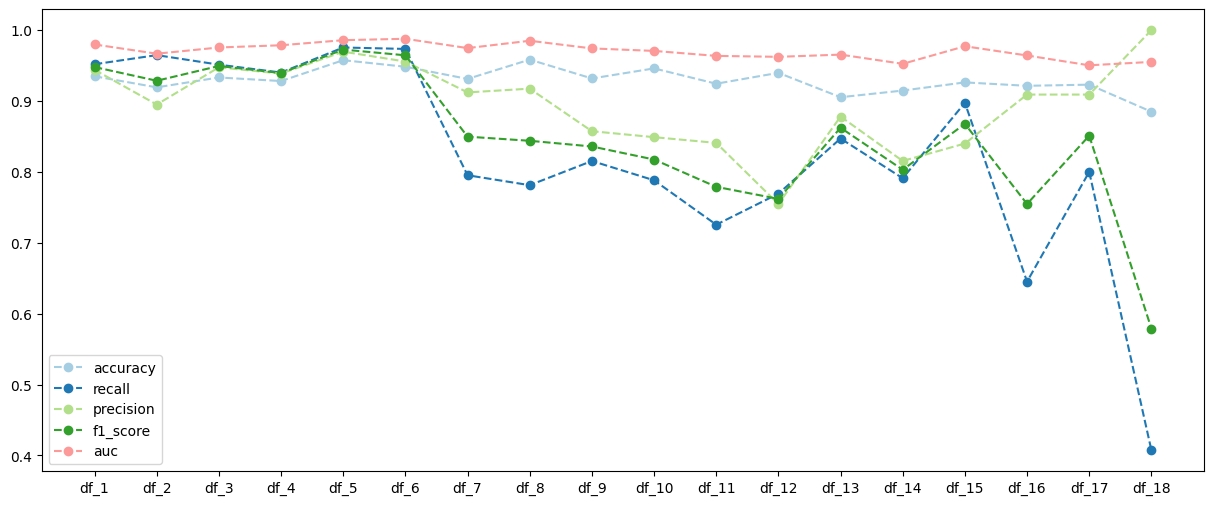

In [62]:
plt.figure(figsize=(15,6))
plt.plot(np.array(acc_list),'--o',label='accuracy')
plt.plot(np.array(recall_list),'--o',label='recall')
plt.plot(np.array(precision_list),'--o',label='precision')
plt.plot(np.array(f1_list),'--o',label='f1_score')
plt.plot(np.array(auc_list),'--o',label='auc')
plt.xticks(range(0,18),labels=dataset_index)
#plt.set_xticklabels(dataset_index)
plt.legend()
plt.show()

In [63]:
# confusion matrix information
for i,index in enumerate(var_index):
    print(f'df_{index}:\n',cm_list[i])
    print('\n')

df_1:
 [[526  54]
 [ 46 910]]


df_2:
 [[391  61]
 [ 19 520]]


df_3:
 [[468  53]
 [ 49 957]]


df_4:
 [[398  39]
 [ 38 597]]


df_5:
 [[ 883  101]
 [  81 3226]]


df_6:
 [[ 736   97]
 [  57 2092]]


df_7:
 [[2162   55]
 [ 147  571]]


df_8:
 [[1506   18]
 [  56  200]]


df_9:
 [[2180   83]
 [ 113  499]]


df_10:
 [[1727   45]
 [  68  253]]


df_11:
 [[879  28]
 [ 56 148]]


df_12:
 [[700  26]
 [ 24  80]]


df_13:
 [[296  20]
 [ 26 144]]


df_14:
 [[226  12]
 [ 14  53]]


df_15:
 [[297  20]
 [ 12 105]]


df_16:
 [[265   4]
 [ 22  40]]


df_17:
 [[128   4]
 [ 10  40]]


df_18:
 [[112   0]
 [ 16  11]]




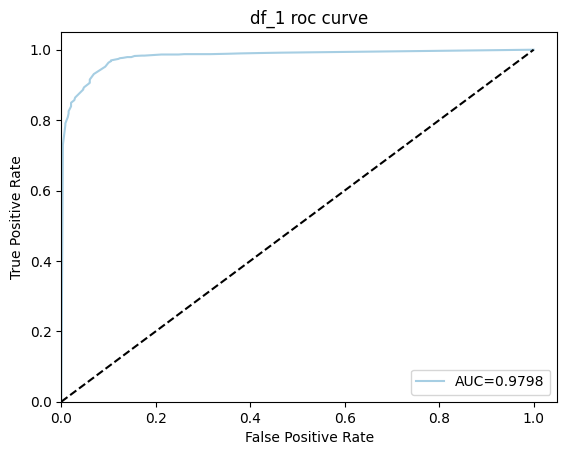

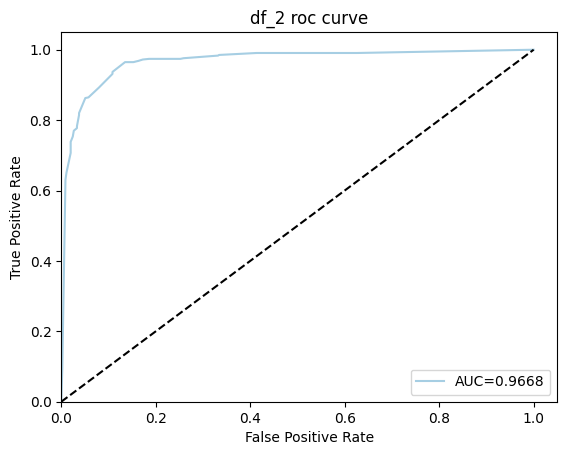

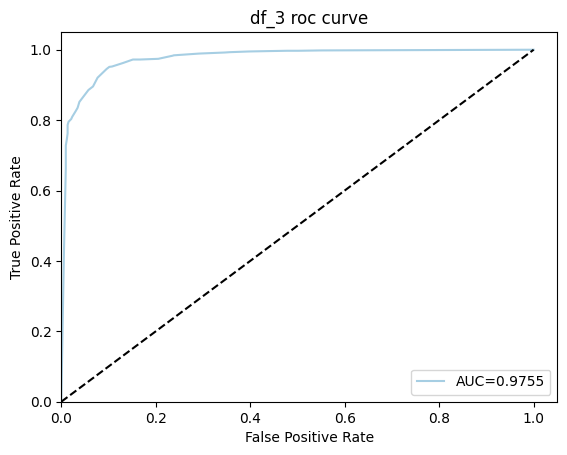

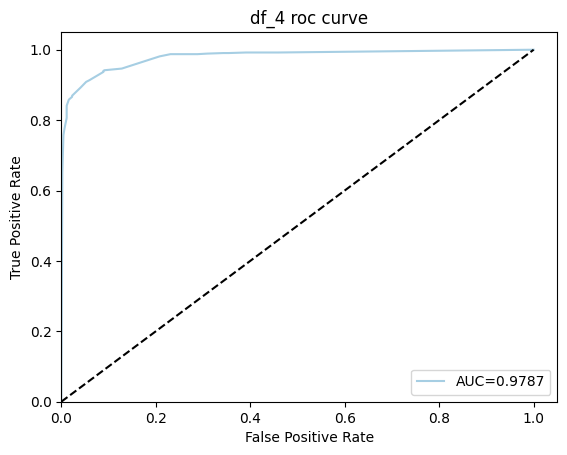

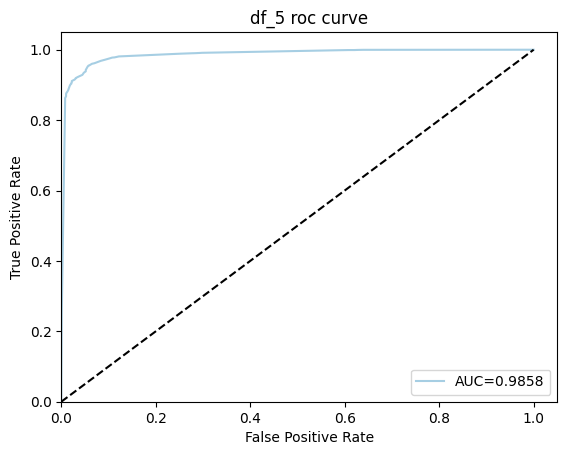

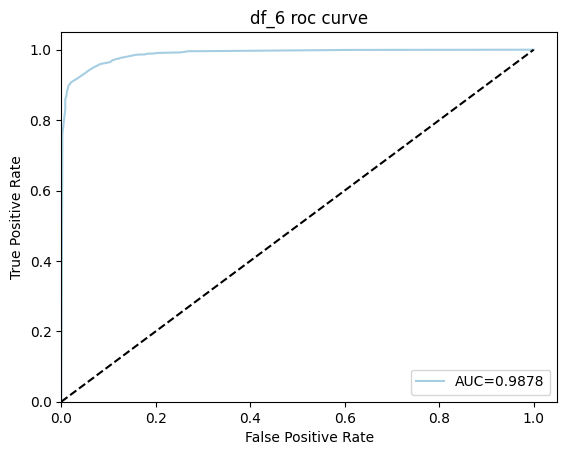

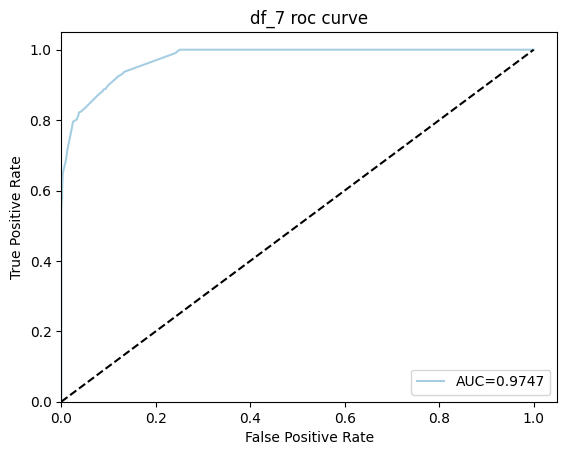

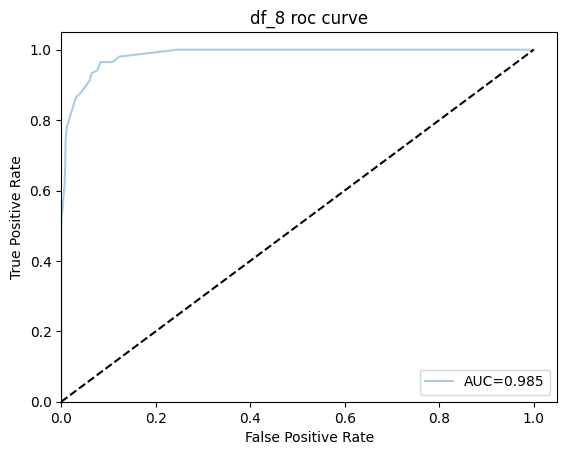

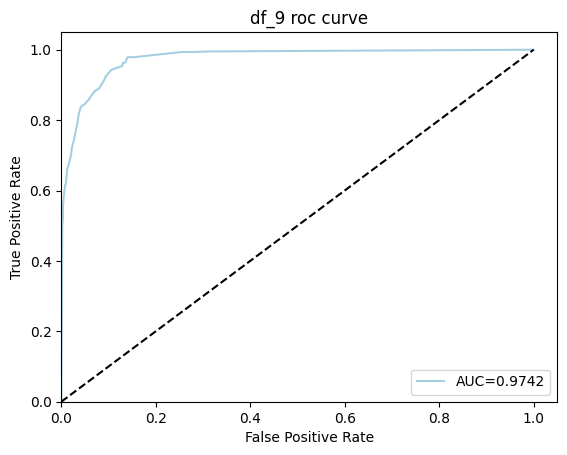

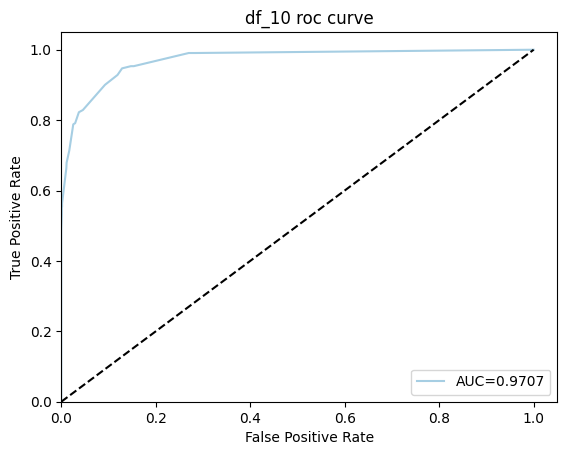

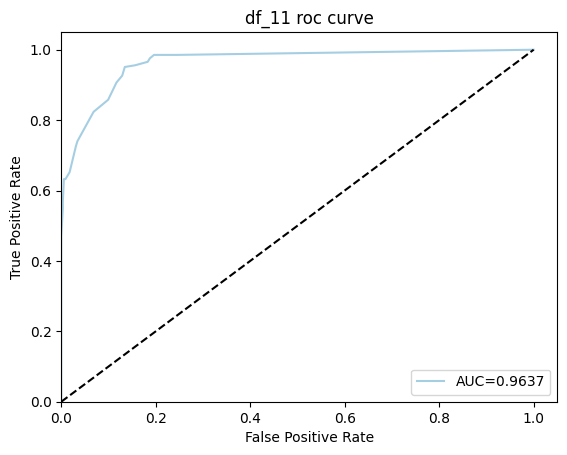

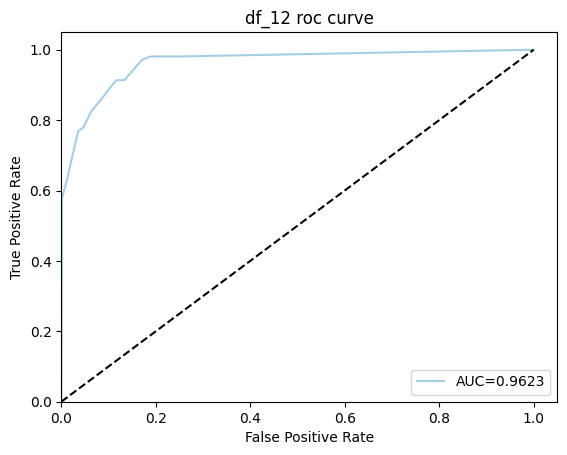

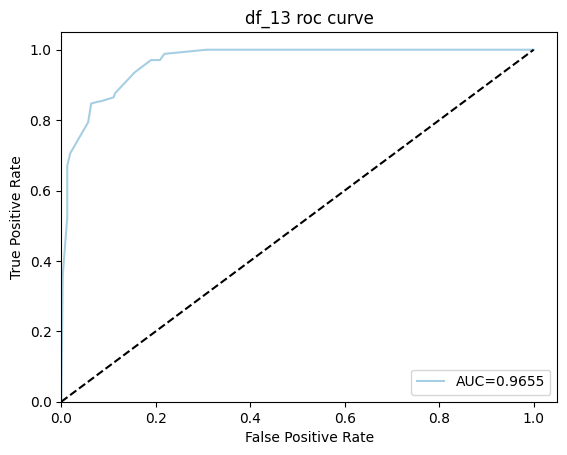

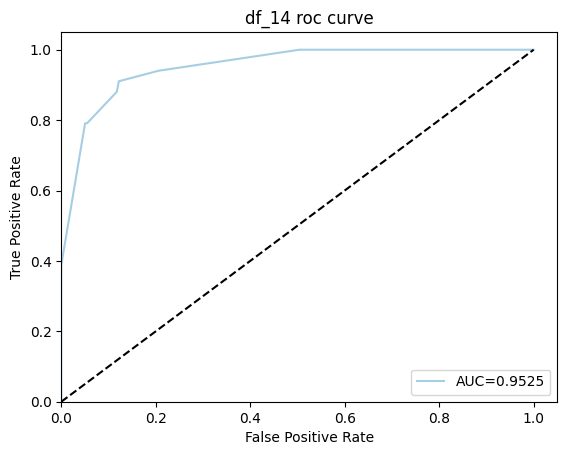

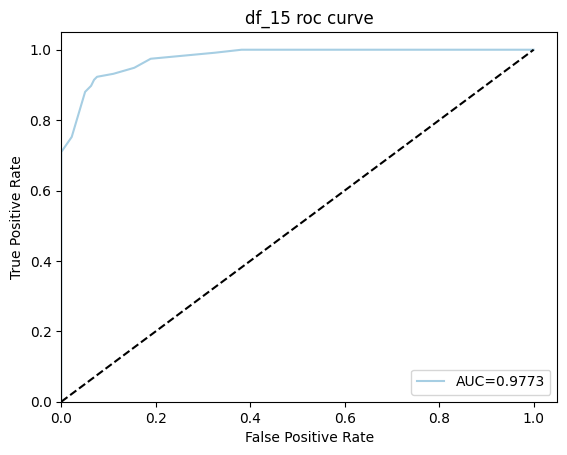

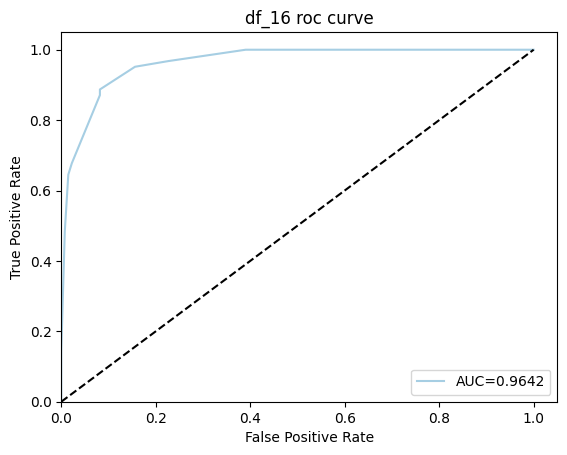

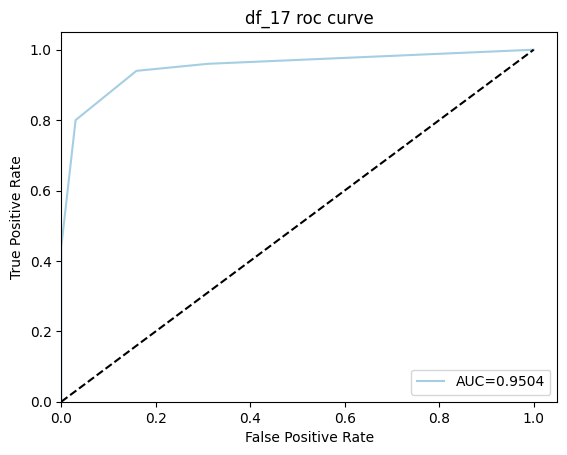

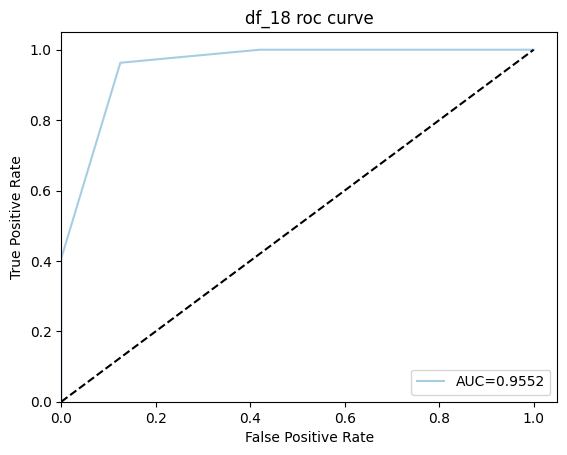

In [64]:
# roc curve
for i,index in enumerate(var_index):
    plt.figure(i)
    plt.plot(
            fpr_list[i],
            tpr_list[i],     
            label=f"AUC={np.round(auc_list[i],4)}"
        )    
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.title(f'df_{index} roc curve')

In [65]:
# feature importance

col = df_1.drop(["Satisfaction"],axis=1).columns
feature_im = np.array(feature_im).reshape(len(var_index),20)

feature_im_top = []

for i in range(len(feature_im)):
    feature_im_top.append(np.sort(feature_im[i])[::-1])

arr = np.argsort(-feature_im)[:,:5]

dict_im = {}
top_1,top_2,top_3,top_4,top_5 = [],[],[],[],[]
for i in range(len(var_index)):
    top_1.append((col[arr[i]][0],round(feature_im_top[i][0],4)))
    top_2.append((col[arr[i]][1],round(feature_im_top[i][1],4)))
    top_3.append((col[arr[i]][2],round(feature_im_top[i][2],4)))
    top_4.append((col[arr[i]][3],round(feature_im_top[i][3],4)))
    top_5.append((col[arr[i]][4],round(feature_im_top[i][4],4)))
dict_im = {'top1':top_1,'top2':top_2,'top3':top_3,'top4':top_4,'top5':top_5}
pd.DataFrame(dict_im,index=dataset_index)

top1                              top2  \
df_1           (Online Boarding, 0.3558)  (In-flight Wifi Service, 0.1719)   
df_2           (Online Boarding, 0.4149)  (In-flight Wifi Service, 0.1684)   
df_3           (Online Boarding, 0.5299)          (Type of Travel, 0.1303)   
df_4           (Online Boarding, 0.4757)          (Type of Travel, 0.1293)   
df_5   (In-flight Entertainment, 0.3809)   (In-flight Wifi Service, 0.208)   
df_6           (Online Boarding, 0.3973)       (In-flight Service, 0.1092)   
df_7    (In-flight Wifi Service, 0.7675)  (Ease of Online Booking, 0.0509)   
df_8    (In-flight Wifi Service, 0.7517)          (Type of Travel, 0.0525)   
df_9    (In-flight Wifi Service, 0.8002)  (Ease of Online Booking, 0.0629)   
df_10   (In-flight Wifi Service, 0.7614)          (Type of Travel, 0.0503)   
df_11   (In-flight Wifi Service, 0.8219)          (Type of Travel, 0.0442)   
df_12   (In-flight Wifi Service, 0.8067)          (Type of Travel, 0.0598)   
df_13    (In-flight Wifi Service, 0.724)          (Type of Travel, 0.1236)   
df_14   (In-flight Wifi Service, 0.8207)          (Type of Travel, 0.1105)   
df_15   (In-flight Wifi Service, 0.7539)          (Type of Travel, 0.0864)   
df_16   (In-flight Wifi Service, 0.4761)         (Online Boarding, 0.3076)   
df_17   (In-flight Wifi Service, 0.8723)          (Type of Travel, 0.1041)   
df_18   (In-flight Wifi Service, 0.9958)          (Type of Travel, 0.0027)   

                                   top3                              top4  \
df_1         (Leg Room Service, 0.1026)            (Customer Type, 0.093)   
df_2         (Leg Room Service, 0.1077)            (Customer Type, 0.073)   
df_3   (In-flight Wifi Service, 0.0946)           (Customer Type, 0.0467)   
df_4   (In-flight Wifi Service, 0.1244)       (In-flight Service, 0.0623)   
df_5          (Online Boarding, 0.0981)           (Customer Type, 0.0803)   
df_6   (In-flight Entertainment, 0.088)  (In-flight Wifi Service, 0.0817)   
df_7            (Customer Type, 0.0384)          (Type of Travel, 0.0282)   
df_8            (Customer Type, 0.0378)        (Check-in Service, 0.0309)   
df_9            (Customer Type, 0.0231)          (Type of Travel, 0.0219)   
df_10  (Ease of Online Booking, 0.0422)           (Customer Type, 0.0378)   
df_11  (Ease of Online Booking, 0.0372)         (Online Boarding, 0.0242)   
df_12  (Ease of Online Booking, 0.0361)        (Baggage Handling, 0.0332)   
df_13        (Check-in Service, 0.0376)        (Baggage Handling, 0.0329)   
df_14           (Customer Type, 0.0327)        (Baggage Handling, 0.0198)   
df_15           (Customer Type, 0.0373)        (Check-in Service, 0.0243)   
df_16          (Type of Travel, 0.1542)        (Baggage Handling, 0.0574)   
df_17       (In-flight Service, 0.0145)            (Seat Comfort, 0.0091)   
df_18           (Customer Type, 0.0015)    (Flight Distance Recoded, 0.0)   

                                 top5  
df_1         (Type of Travel, 0.0654)  
df_2         (Type of Travel, 0.0676)  
df_3       (On-board Service, 0.0408)  
df_4          (Customer Type, 0.0408)  
df_5           (Seat Comfort, 0.0468)  
df_6            (Cleanliness, 0.0658)  
df_7       (Check-in Service, 0.0247)  
df_8        (Online Boarding, 0.0302)  
df_9        (Online Boarding, 0.0212)  
df_10      (In-flight Service, 0.029)  
df_11         (Customer Type, 0.0208)  
df_12         (Customer Type, 0.0168)  
df_13          (Customer Type, 0.023)  
df_14      (On-board Service, 0.0163)  
df_15       (Online Boarding, 0.0183)  
df_16      (Check-in Service, 0.0043)  
df_17  (Flight Distance Recoded, 0.0)  
df_18         (Baggage Handling, 0.0)

# Additional consideration about dataset - Analysis on Miss-matching Scores with Satisfaction

In [66]:
scores= df[["Departure and Arrival Time Convenience",
   "Ease of Online Booking",
   "Check-in Service",
   "Online Boarding",
   "Seat Comfort",
   "Leg Room Service",
   "Cleanliness",
   "Food and Drink",
   "In-flight Service",
   "In-flight Wifi Service",
   "In-flight Entertainment",
   "Baggage Handling"]]

label = df['Satisfaction']

In [67]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition

X = np.array(scores)
y = np.array(label).ravel()

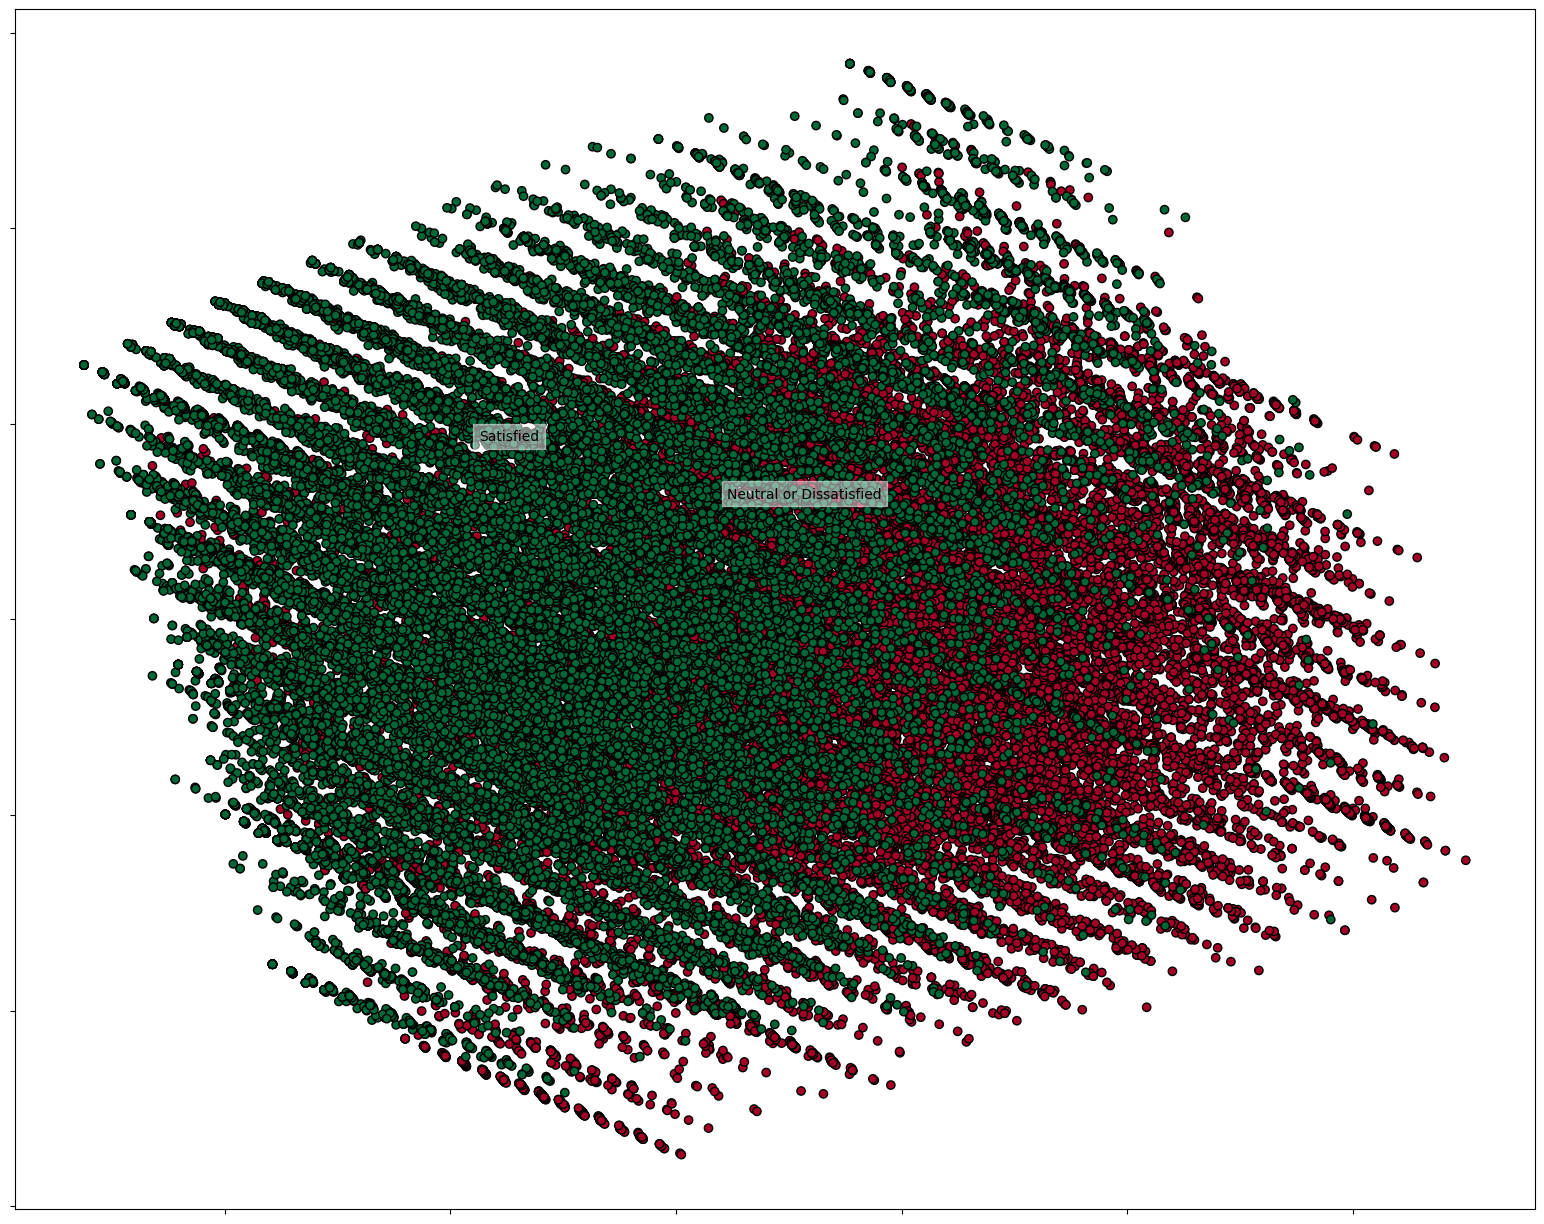

In [68]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

fig = plt.figure(1, figsize=(16, 12))
plt.clf()

ax = fig.add_subplot(111)
ax.set_position([0, 0, 0.95, 1])

plt.cla()

for name, label in [("Neutral or Dissatisfied", 0), ("Satisfied", 1)]:
    ax.text(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
# y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlGn', edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

plt.show()

from the PCA, we can see that there exist miss-matching between scores and satisfactions

In [69]:
import time
from sklearn.cluster import KMeans

n_clusters = 2

k_means = KMeans(init="k-means++", n_clusters=n_clusters, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

In [70]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

k_means_cluster_centers = k_means.cluster_centers_

k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

k_means_labels = 1- k_means_labels

Text(-3.5, 1.8, 'train time: 0.32s\ninertia: 674899.410564')

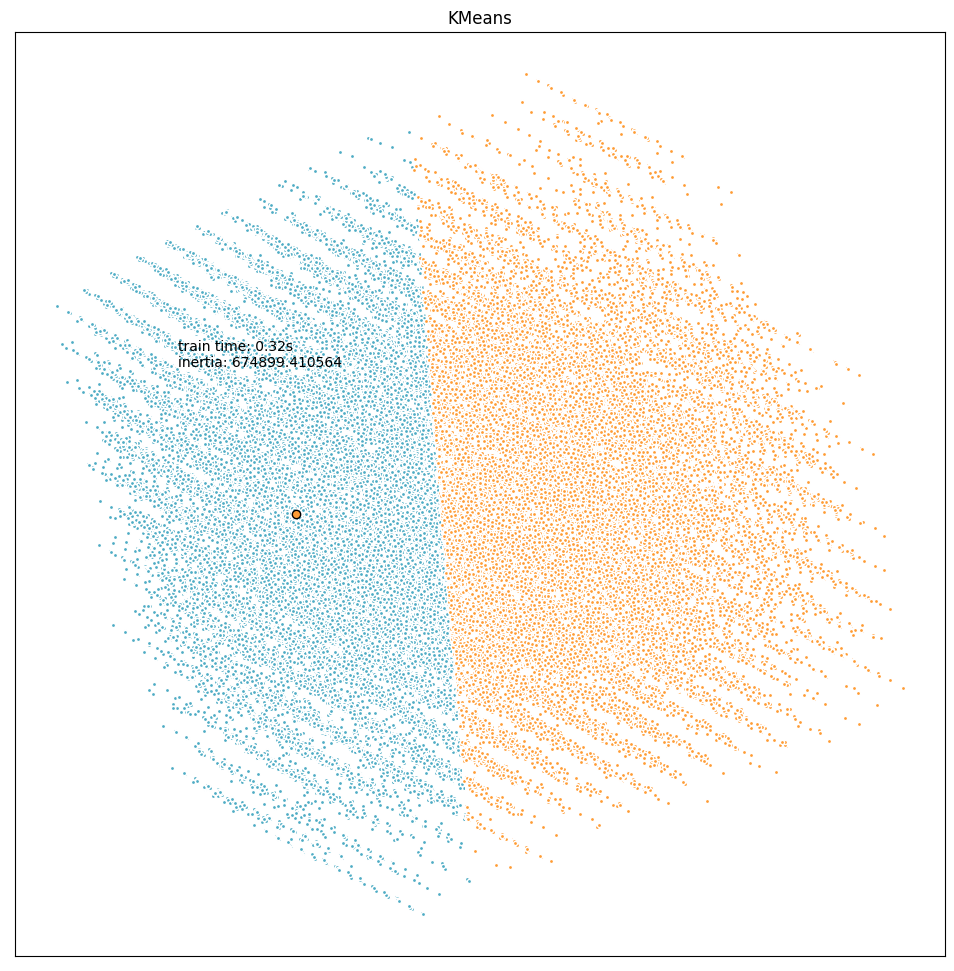

In [71]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))
colors = ["#4EACC5", "#FF9C34"]

# KMeans
ax = fig.add_subplot()
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, "train time: %.2fs\ninertia: %f" % (t_batch, k_means.inertia_))

In [72]:
confident_score_or_not = (k_means_labels == y)

In [73]:
confident_score_or_not

array([ True,  True, False, ..., False, False, False])

In [74]:
df["confident score or not"] = confident_score_or_not

In [75]:
df

Gender  Age Customer Type Type of Travel         Class  \
0         Male   48    First-time       Business      Business   
8         Male   50     Returning       Business      Business   
10      Female   28    First-time       Business      Business   
11      Female   27    First-time       Business      Business   
12        Male   24    First-time       Business       Economy   
...        ...  ...           ...            ...           ...   
129863  Female   39     Returning       Business      Business   
129864    Male   38     Returning       Business      Business   
129866  Female   20    First-time       Business       Economy   
129871  Female   32     Returning       Business  Economy Plus   
129878    Male   50     Returning       Personal  Economy Plus   

        Flight Distance  Departure Delay  Arrival Delay  \
0                   821                2            5.0   
8                  2607                0            0.0   
10                  821                0            5.0   
11                  421               20           21.0   
12                  453               16           30.0   
...                 ...              ...            ...   
129863             2747                0            0.0   
129864             2740                0            0.0   
129866              447                0            4.0   
129871              337                0            1.0   
129878              337               31           22.0   

        Departure and Arrival Time Convenience  Ease of Online Booking  ...  \
0                                            3                       3  ...   
8                                            1                       1  ...   
10                                           1                       1  ...   
11                                           2                       2  ...   
12                                           2                       2  ...   
...                                        ...                     ...  ...   
129863                                       1                       5  ...   
129864                                       3                       3  ...   
129866                                       3                       4  ...   
129871                                       2                       4  ...   
129878                                       4                       4  ...   

        Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  \
0                  5                 2            5               5   
8                  3                 4            3               3   
10                 2                 5            2               2   
11                 2                 5            1               1   
12                 5                 4            5               5   
...              ...               ...          ...             ...   
129863             4                 5            3               3   
129864             4                 5            5               2   
129866             5                 3            4               4   
129871             4                 1            4               4   
129878             4                 5            3               3   

        In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
0                       5                       3                        5   
8                       4                       4                        4   
10                      4                       1                        2   
11                      3                       1                        1   
12                      4                       2                        5   
...                   ...                     ...                      ...   
129863                  5                       1                        5   
129864                  5                       3                        5   
12

In [76]:
len(df[~df['confident score or not']])

93780

In [77]:
df[~df['confident score or not']]['Satisfaction'].sum()

47321

### Conclusion:

totally, 36174 customers gives the opposite scores and satisfaction opinions, i.e., giving relatively low scores while satisfied with the fights or giving relatively high scores while neutral or unsatisfied with the fights

particularly, 9089 customers are satisfied with the flights while gives a relatively low scores.

## EM model

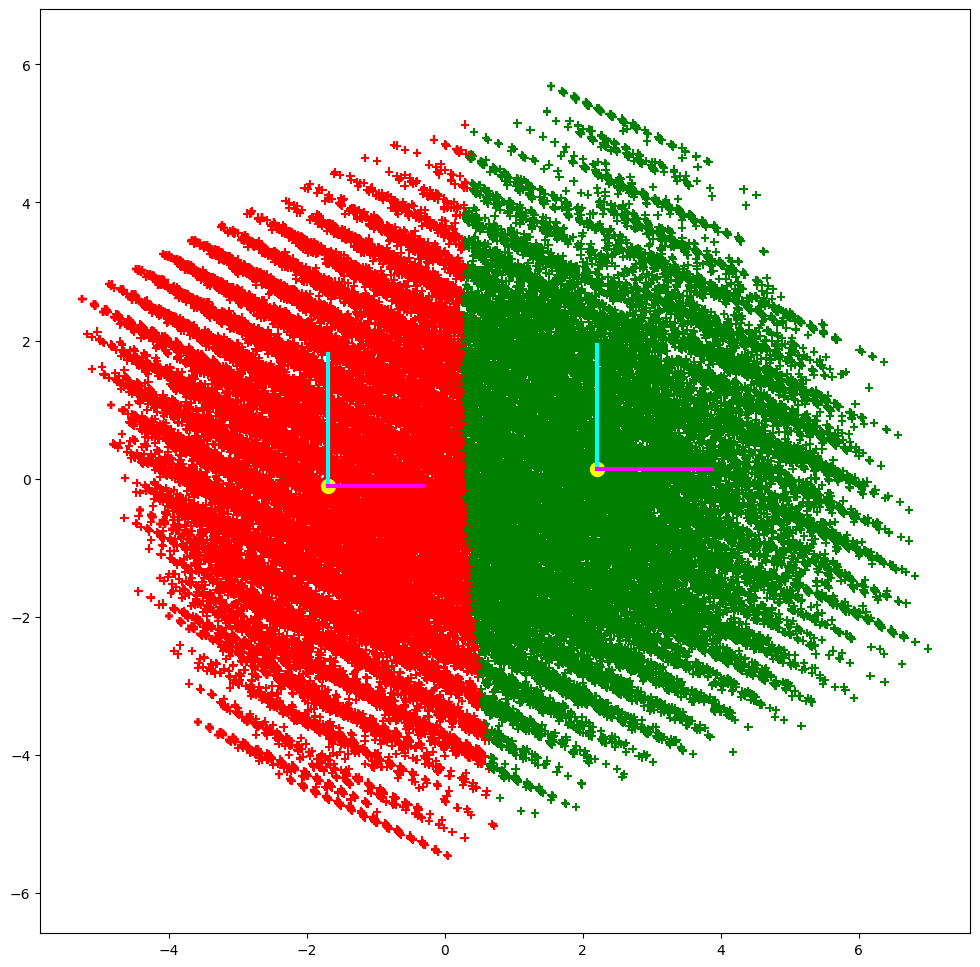

In [78]:
import numpy as np
from sklearn import datasets, decomposition, mixture
import matplotlib.pyplot as plt

em = mixture.GaussianMixture(n_components = 2, random_state = 2019, covariance_type='diag')

label = [0]

pcolor = ['red', 'green', 'blue']
vcolor = ['cyan', 'magenta', 'grey', 'black']
    
em.fit(X)
label = em.predict(X)

plt.figure(figsize=(12, 12))
plt.axis('equal')
dim = 2

means = em.means_
fig = plt.subplot()
plt.scatter(X[:,0], X[:,1], c=[pcolor[j] for j in label], marker='+')
plt.scatter(means[:,0], means[:,1], c='yellow', s=100)
covpt = np.zeros((3 * dim, dim))
for j in range(2):
    idx = np.argsort(em.covariances_[j,:])[::-1]
    for k in range(dim):
        covpt[dim*j+k,:] = em.means_[j,:]
        covpt[dim*j+k,idx[k]] += np.sqrt(em.covariances_[j,idx[k]])

for j in range(2):
    for k in range(dim):
        plt.plot([means[j,0], covpt[dim*j+k,0]], [means[j,1], covpt[dim*j+k,1]], vcolor[k], lw=3)

plt.show()

### optional: delete the miss-matching rows

Since we figured out which customers misunderstood the sore criteria, we can also delete the mismatching data to get a more cleaned dataset for bunary classification. 

Noted: this is a optional proposal for the data cleaning.

In [79]:
# i = df[~df['confident score or not']]['Satisfaction'].index

In [80]:
# i

In [81]:
# df = df.drop(i)

# comparision for test dataset

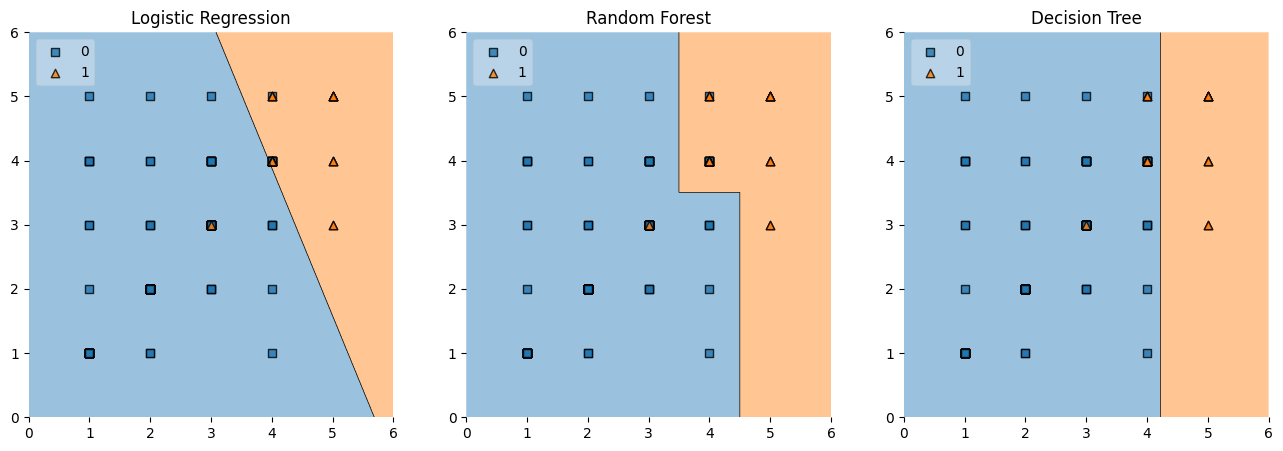

In [82]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
# from sklearn import svm

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import itertools

from mlxtend.plotting import plot_decision_regions

value = 1.70
width = 0.85

# Considering only the most important features
X_list = x_test[["In-flight Wifi Service", "Online Boarding"]]
X = np.asarray(X_list, dtype=np.float32)
y_list = y_test
y = np.asarray(y_list, dtype=np.int32)

# Decision Regions Plotting
gs = gridspec.GridSpec(1, 3)
fig = plt.figure(figsize=(16, 5))

labels = ['Logistic Regression',
          'Random Forest',
          'Decision Tree']

for clf, lab, grd in zip([lr, rf, clf],
                         labels,
                         # [(0,0), (0, 1), (0, 2)],
                         itertools.product([0, 1, 2],
                         repeat=2)
                        ):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                # filler_feature_values={2: value, 3: value}, 
                                # filler_feature_ranges={2: width, 3: width}, 
                                legend=2)
    plt.title(lab)

plt.show()

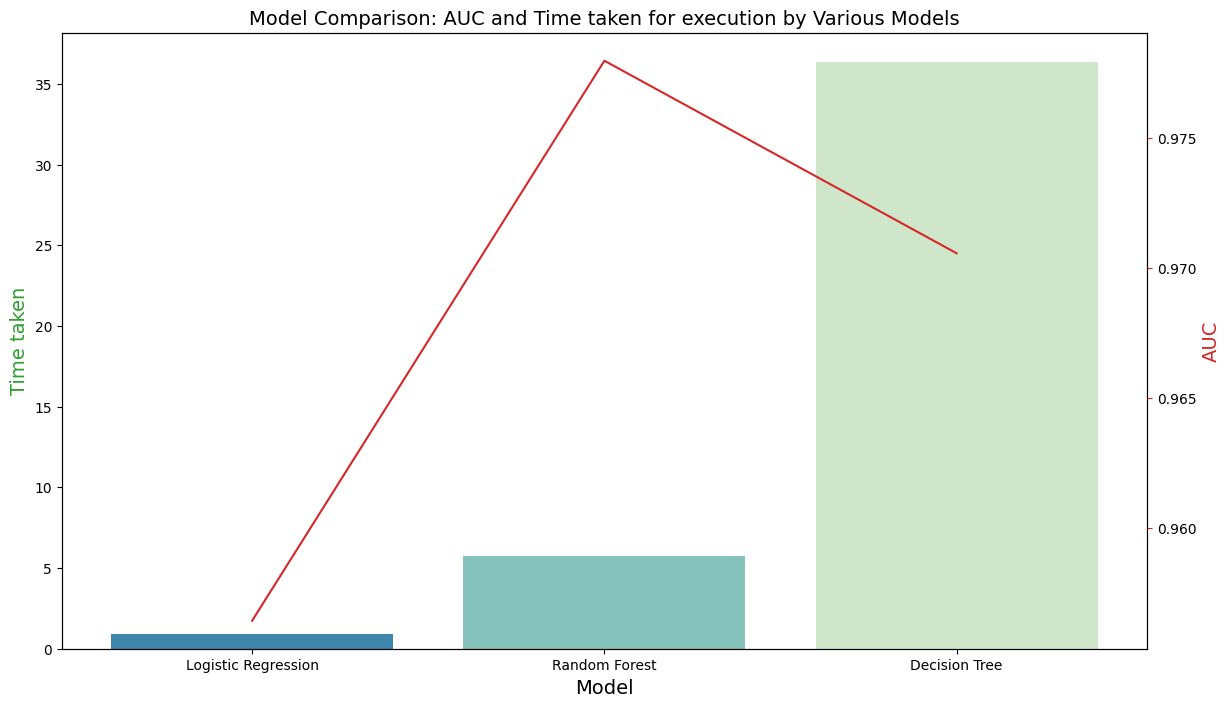

In [83]:
roc_auc_scores = [mean_auc_lr, mean_auc_rf, mean_auc_dt]
tt = [lr_time, rf_time, dt_time]

model_data = {'Model': ['Logistic Regression','Random Forest', 'Decision Tree'],
              'AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: AUC and Time taken for execution by Various Models', fontsize=14)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('Time taken', fontsize=14, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='GnBu_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('AUC', fontsize=14, color=color)
ax2 = sns.lineplot(x='Model', y='AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)